In [ ]:
!pip install --upgrade --no-cache-dir git+https://github.com/nobitex/tvdatafeed

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/nobitex/tvdatafeed to c:\users\kittipak\appdata\local\temp\pip-req-build-3qfuvfb7
  Resolved https://github.com/nobitex/tvdatafeed to commit a7034f04509b67224618917c29272796e4fff858
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/nobitex/tvdatafeed 'C:\Users\Kittipak\AppData\Local\Temp\pip-req-build-3qfuvfb7'


In [ ]:
from tvDatafeed import TvDatafeed
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [ ]:
from tvDatafeed import TvDatafeed, Interval
from datetime import datetime
username = 'xxx'
password = 'xxx'
#tv = TvDatafeed(username, password, chromedriver_path=None)
tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [ ]:
now = datetime.now()
print("now =", now)
data=tv.get_hist(symbol='XAUUSD', exchange='OANDA', interval=Interval.in_daily, n_bars=500)
data

now = 2023-10-12 00:18:49.541974


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-11-04 04:00:00,OANDA:XAUUSD,1769.690,1798.950,1769.645,1791.780,49706.0
2021-11-05 04:00:00,OANDA:XAUUSD,1791.780,1818.360,1785.060,1818.170,60851.0
2021-11-08 05:00:00,OANDA:XAUUSD,1818.170,1826.515,1812.495,1824.220,41143.0
2021-11-09 05:00:00,OANDA:XAUUSD,1824.220,1832.760,1819.190,1831.910,45955.0
2021-11-10 05:00:00,OANDA:XAUUSD,1831.910,1868.626,1822.400,1849.270,70731.0
...,...,...,...,...,...,...
2023-10-05 04:00:00,OANDA:XAUUSD,1821.315,1829.225,1813.030,1820.300,139390.0
2023-10-06 04:00:00,OANDA:XAUUSD,1820.300,1834.920,1810.465,1832.035,163231.0
2023-10-09 04:00:00,OANDA:XAUUSD,1832.035,1863.550,1832.035,1861.405,129869.0


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
!pip install pmdarima --quiet
import pmdarima as pm

In [ ]:
df = data['close']
df = pd.DataFrame(df)
df.tail(5)

,close
datetime,
2023-10-05 04:00:00,1820.300
2023-10-06 04:00:00,1832.035
2023-10-09 04:00:00,1861.405
2023-10-10 04:00:00,1860.460
2023-10-11 04:00:00,1873.275


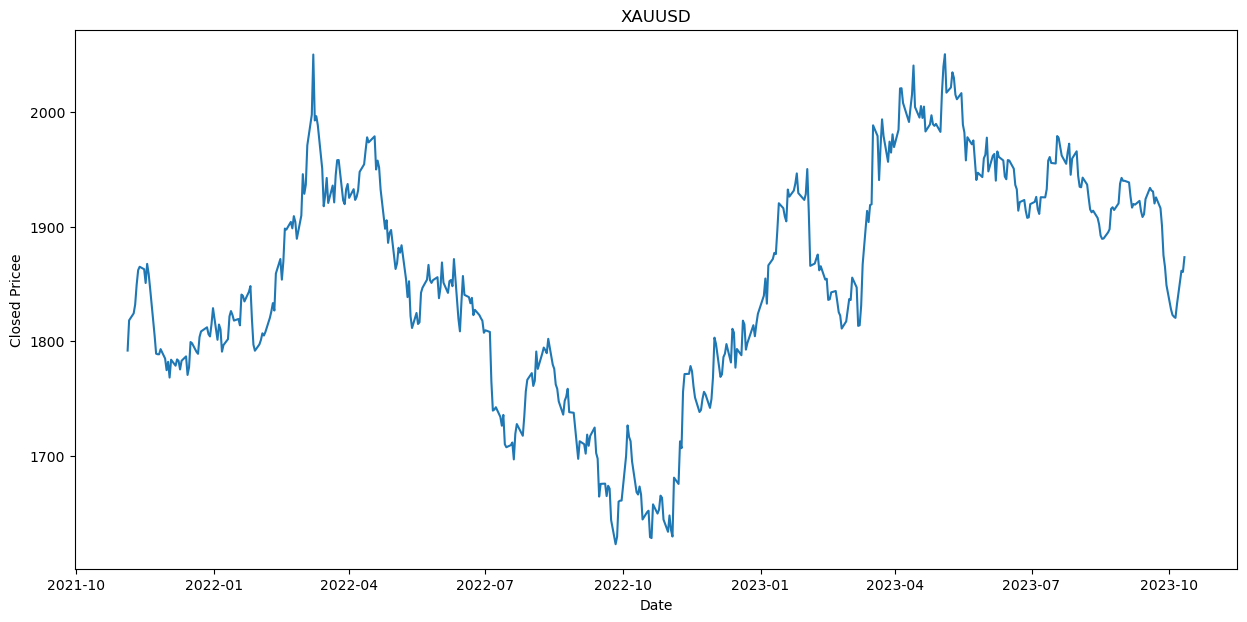

In [ ]:
# At first glance, there looks to be a positive trend

plt.figure(figsize=(15,7))
plt.title("XAUUSD")
plt.xlabel('Date')
plt.ylabel('Closed Pricee')
plt.plot(df['close'])
plt.show()

## <center> Rolling Statistics

A rolling average is a great way to visualize how the dataset is trending. As the dataset provides counts by month, a window size of 12 will give us the annual rolling average.

We will also include the rolling standard deviation to see how much the data varies from the rolling average.

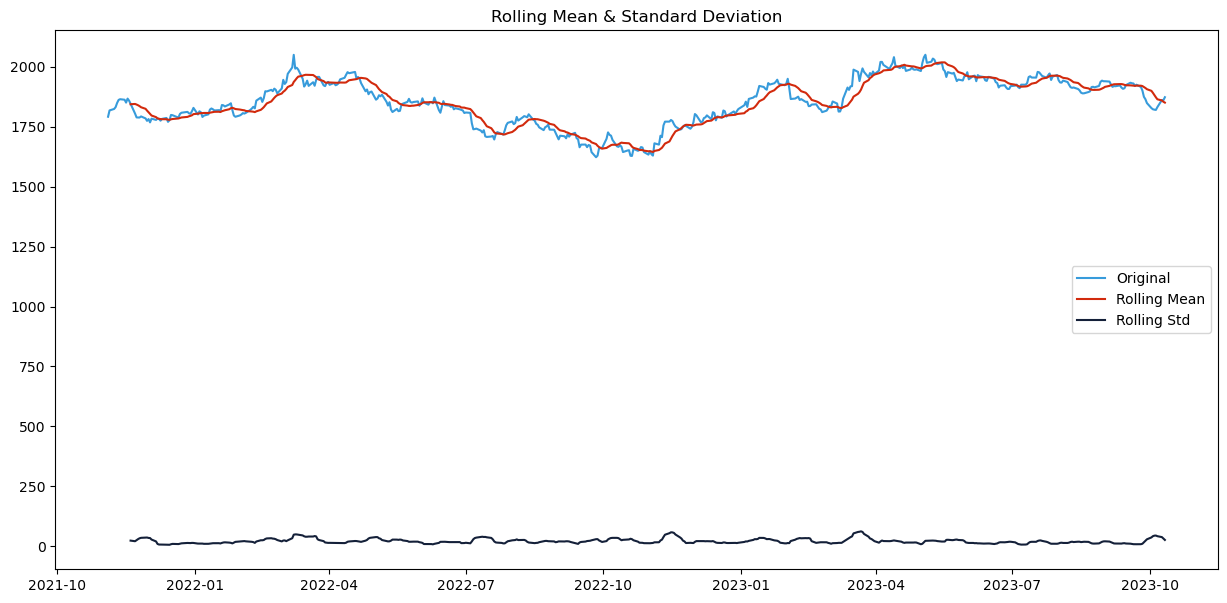

In [ ]:
# Determine rolling statistics
df["rolling_avg"] = df['close'].rolling(window=12).mean() # window size 12 denotes 12 months, giving rolling mean at yearly level
df["rolling_std"] = df['close'].rolling(window=12).std()

# Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["close"], color='#379BDB', label='Original')
plt.plot(df["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(df["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## <center>Augmented Dickey–Fuller Test</center>

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. Similar to a t-test, we set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

<B>Null Hypothesis:</B> The data is not stationary.

<B>Alternative Hypothesis:</B> The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

- p-value <= significance level (0.01, 0.05, 0.10, etc.)

If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

We can see in the ADF test below that the p-value is 0.302809, meaning that it is very likely that the data is not stationary.

In [ ]:
# Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  -1.956170
p-value                          0.306115
#Lags Used                      13.000000
Number of Observations Used    486.000000
Critical Value (1%)             -3.443877
Critical Value (5%)             -2.867505
Critical Value (10%)            -2.569947
dtype: float64


In [ ]:
df1 = data['close']
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.head(5)

0    1791.78
1    1818.17
2    1824.22
3    1831.91
4    1849.27
Name: close, dtype: float64

Let’s difference the series and see how the autocorrelation plot looks like.

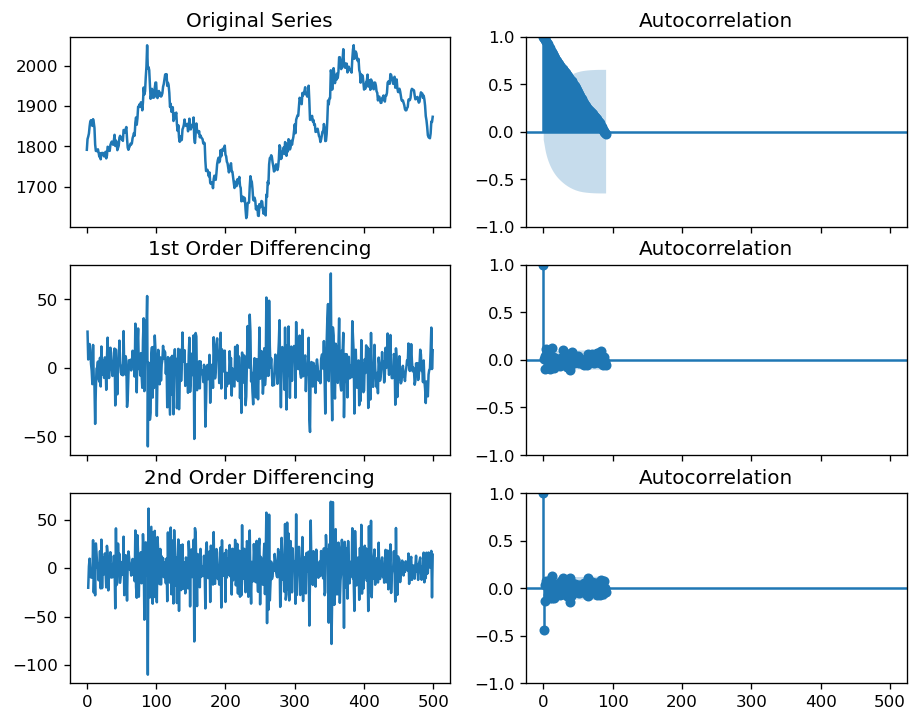

In [ ]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1); axes[0, 0].set_title('Original Series')
plot_acf(df1, ax=axes[0, 1], lags=90)

# 1st Differencing
axes[1, 0].plot(df1.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.diff().dropna(), ax=axes[1, 1], lags=90)

# 2nd Differencing
axes[2, 0].plot(df1.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.diff().diff().dropna(), ax=axes[2, 1], lags=90)

plt.show()

## <center>ARIMA Model Selection w/ Auto-ARIMA</center>

Although our data is almost certainly not stationary (p-value = 0.302809), let's see how well a standard ARIMA model performs on the time series

Using the auto_arima function from the `pmdarima` package, we can perform a parameter search for the optimal values of the model.


IMPORTANT NOTE:
- When we print out the model summary after training, the header will be SARIMAX regardless of what model parameters we use. If we set the seasonality to FALSE or the m parameter to 1 then we have a standard ARIMA model. This will be what we train first. See this Stack Overflow question for more information --> [auto_arima(... , seasonal=False) but got SARIMAX?](https://stackoverflow.com/questions/69528507/auto-arima-seasonal-false-but-got-sarimax)

In [ ]:
# Standard ARIMA Model
ARIMA_model = pm.auto_arima(df['close'],
                      start_p=1,
                      start_q=1,
                      test='adf', # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                      d=None,# let model determine 'd'
                      seasonal=False, # No Seasonality for standard ARIMA
                      trace=True, #logs
                      error_action='warn', #shows errors ('ignore' silences these)
                      suppress_warnings=True,
                      stepwise=True)
print(ARIMA_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4187.141, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4191.633, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4193.598, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4193.589, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4189.685, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4192.186, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4192.910, Time=0.34 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4191.342, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4190.586, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.71 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4185.193, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4191.640, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4191.649, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4190.243, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

## <center>Model Diagnostics</center>

Four plots result from the plot_diagnostics function. The Standardized residual, Histogram plus KDE estimate, Normal q-q, and a correlogram.

We can interpret the model as a good fit based on the following conditions.

Standardized residual
- There are no obvious patterns in the residuals, with values having a mean of zero and having a uniform variance.

Histogram plus KDE estimate
- The KDE curve should be very similar to the normal distribution (labeled as N(0,1) in the plot)

Normal Q-Q
- Most of the data points should lie on the straight line

Correlogram (ACF plot)
- 95% of correlations for lag greater than zero should not be significant. The grey area is the confidence band, and if values fall outside of this then they are statistically significant. In our case, there are a few values outside of this area, and therefore we may need to add more predictors to make the model more accurate

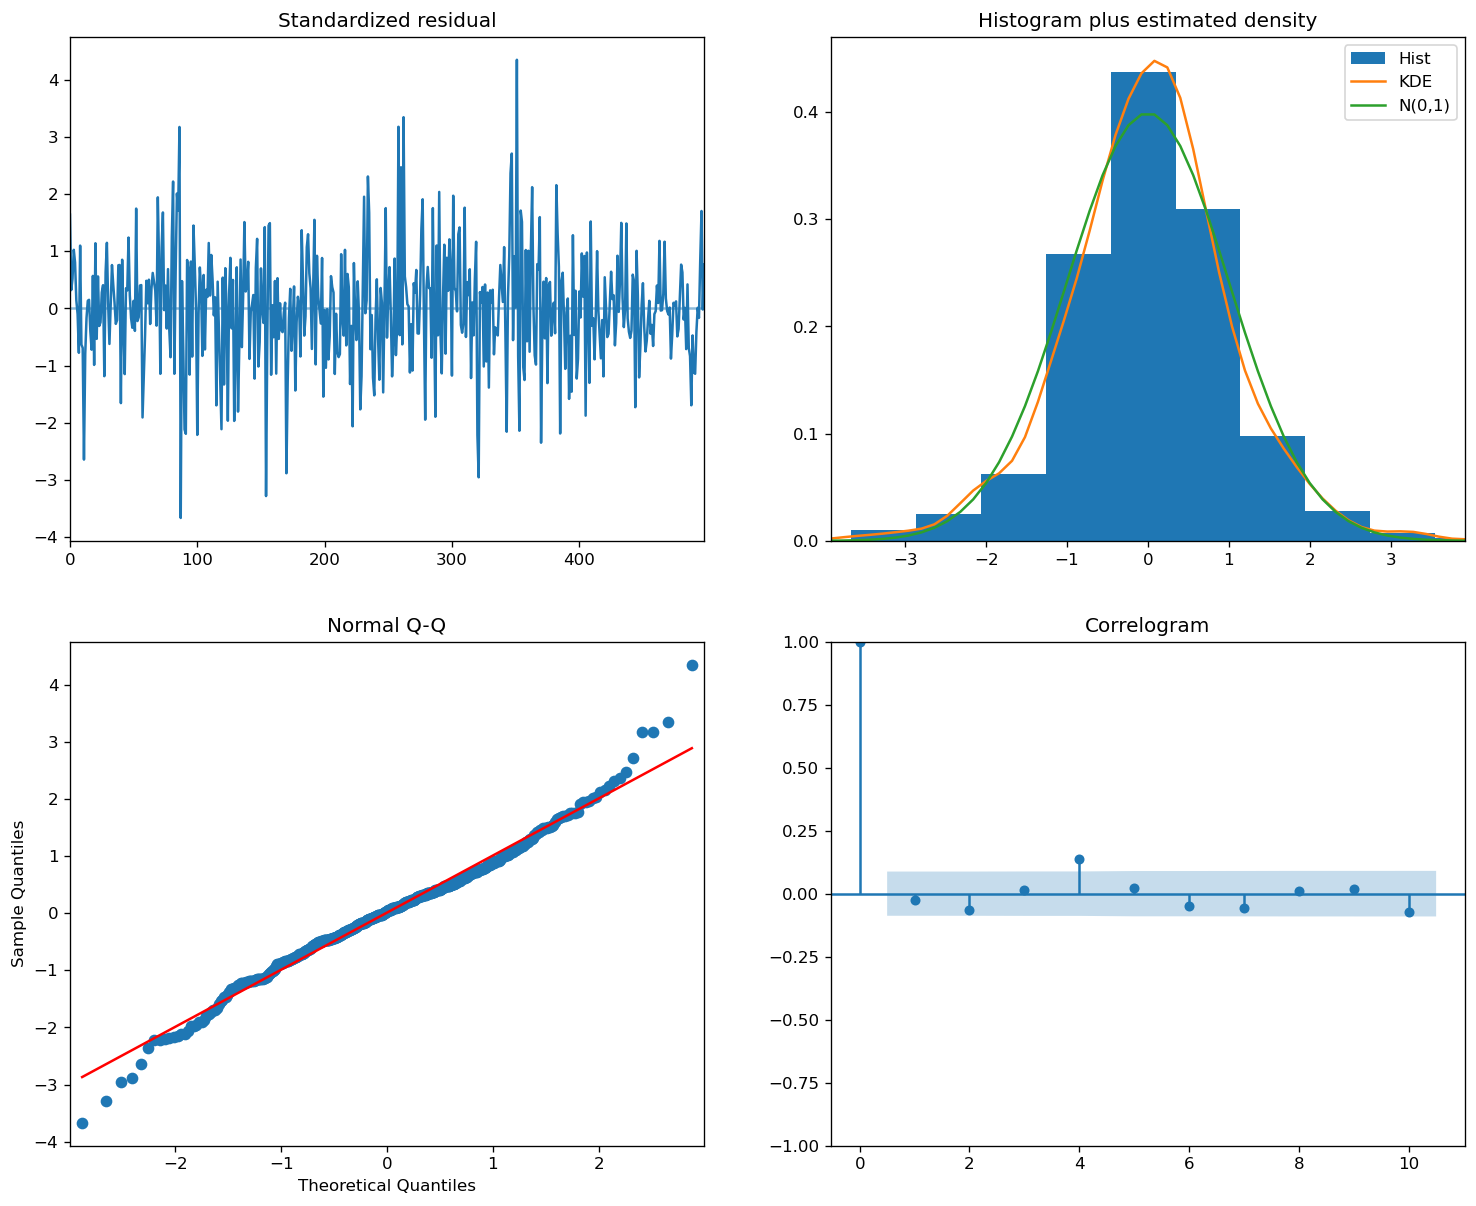

In [ ]:
ARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


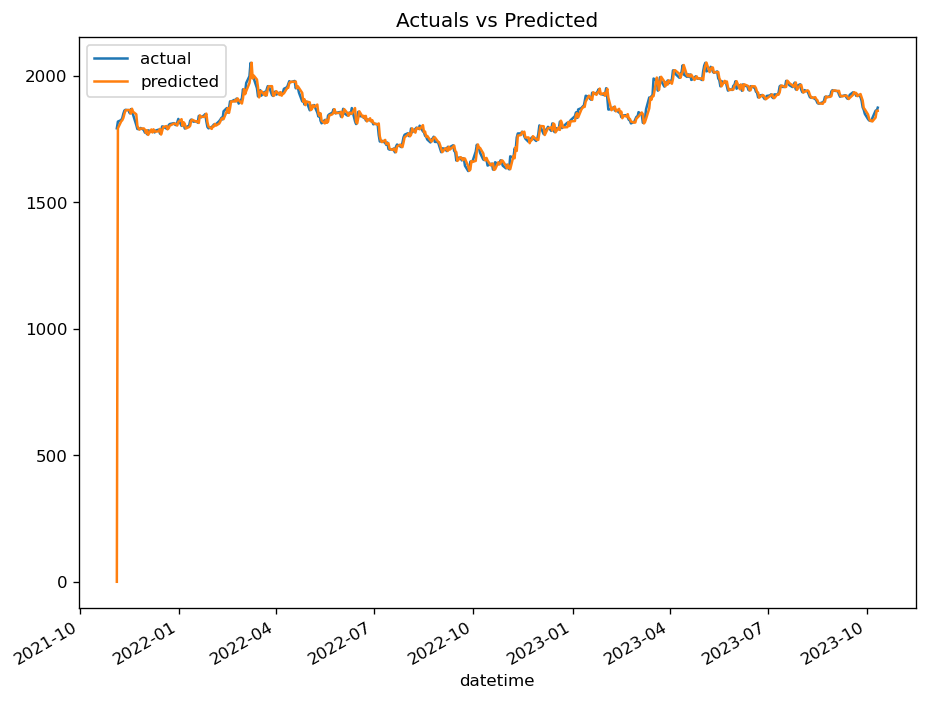

In [ ]:
# Actual vs Fitted Plot

model = ARIMA(df.close, order=(1,1,1))
model_fit = model.fit()

actual = df.close
predicted = model_fit.predict()
pd.DataFrame({'actual':actual, 'predicted':predicted}).plot(title='Actuals vs Predicted');

## __How to do find the optimal ARIMA model manually using Out-of-Time Cross validation__

Take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

First, create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio

In [ ]:
75/100 * 500

375.0

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.close[:375]
test = df.close[375:]

In [ ]:
print(train.shape, test.shape)

(375,) (125,)


                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  375
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1589.988
Date:                Thu, 12 Oct 2023   AIC                           3185.976
Time:                        00:19:05   BIC                           3197.749
Sample:                             0   HQIC                          3190.650
                                - 375                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9316      0.035    -26.588      0.000      -1.000      -0.863
ma.L1          0.9775      0.020     49.816      0.000       0.939       1.016
sigma2       288.2860     16.839     17.120      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\P

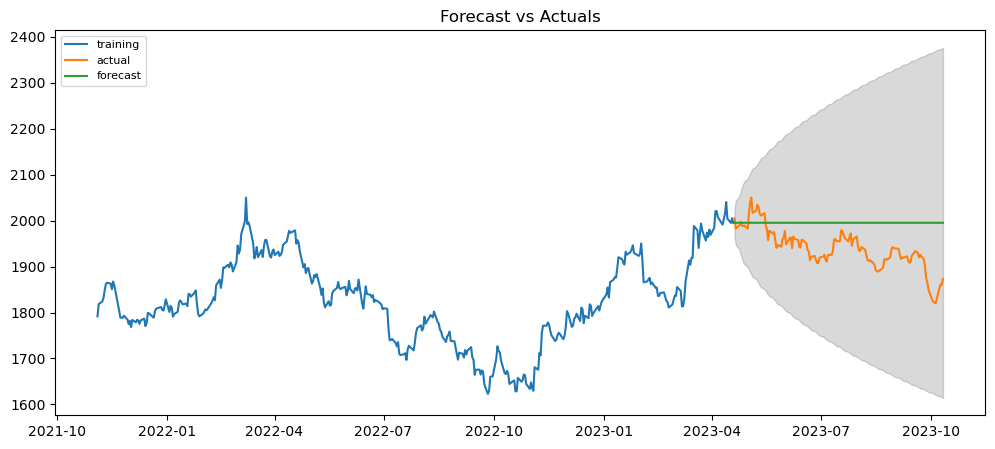

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()
print(fitted.summary())

# Forecast
n_steps = test.shape[0]
fc = fitted.forecast(n_steps, alpha=0.05)  # 95% conf
fc.index = test.index

# get forecast with updated
forecast = fitted.get_forecast(test.shape[0])

# Mean forecast
yhat = forecast.predicted_mean

# Confidence intervals of forecasts
conf = forecast.conf_int(alpha=0.05)
conf.index = test.index

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)  # Use iloc to access the first column
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)  # Use iloc to access the second column

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Find Model Accuracy

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.0319515347067757,
 'me': 56.16096184009703,
 'mae': 61.10310106693905,
 'mpe': 0.02951586851996103,
 'rmse': 71.87306585956394,
 'acf1': 0.9447106973280006,
 'corr': 0.03640658103007837,
 'minmax': 0.03060254819647157}

## <center>SARIMAX Model Selection</center>

Now let's practice adding in an exogenous variable. In this example, I am simply going to add the month number as an exogenous variable, but this is not super useful as this is already conveyed through the seasonality.

Note that we are adding additional square brackets around the data being passed into the SARIMAX model.

In [ ]:
now = datetime.now()
print("now =", now)
data2=tv.get_hist(symbol='XAUUSD', exchange='OANDA', interval=Interval.in_daily, n_bars=500)
data2

now = 2023-10-12 00:19:05.386022


,symbol,open,high,low,close,volume
datetime,,,,,,
2021-11-04 04:00:00,OANDA:XAUUSD,1769.690,1798.950,1769.645,1791.780,49706.0
2021-11-05 04:00:00,OANDA:XAUUSD,1791.780,1818.360,1785.060,1818.170,60851.0
2021-11-08 05:00:00,OANDA:XAUUSD,1818.170,1826.515,1812.495,1824.220,41143.0
2021-11-09 05:00:00,OANDA:XAUUSD,1824.220,1832.760,1819.190,1831.910,45955.0
2021-11-10 05:00:00,OANDA:XAUUSD,1831.910,1868.626,1822.400,1849.270,70731.0
...,...,...,...,...,...,...
2023-10-05 04:00:00,OANDA:XAUUSD,1821.315,1829.225,1813.030,1820.300,139390.0
2023-10-06 04:00:00,OANDA:XAUUSD,1820.300,1834.920,1810.465,1832.035,163231.0
2023-10-09 04:00:00,OANDA:XAUUSD,1832.035,1863.550,1832.035,1861.405,129869.0


In [ ]:
df2 = data2['close']
df2 = pd.DataFrame(df2)
df2.head(5)

,close
datetime,
2021-11-04 04:00:00,1791.78
2021-11-05 04:00:00,1818.17
2021-11-08 05:00:00,1824.22
2021-11-09 05:00:00,1831.91
2021-11-10 05:00:00,1849.27


In [ ]:
#adding exogenous variable
df2['month_index'] = df2.index.month
df2.head(5)

,close,month_index
datetime,,
2021-11-04 04:00:00,1791.78,11
2021-11-05 04:00:00,1818.17,11
2021-11-08 05:00:00,1824.22,11
2021-11-09 05:00:00,1831.91,11
2021-11-10 05:00:00,1849.27,11


## Find the best Paramete for SARIMAX Model

In [ ]:
# SARIMAX Model
SARIMAX_model = pm.auto_arima(df2[['close']], exogenous=df2[['month_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.26 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=5308.158, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=4320.293, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=4869.403, Time=0.67 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=5306.162, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=4438.078, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=4243.272, Time=2.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=4.97 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.13 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=5302.511, Time=2.66 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=4245.268, Time=3.35 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=4245.268, Time=3.48 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=4866.916, Time=2.76 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=4244.929, Time=6.37 sec
 ARIMA(1,0,0)(2,1,0)[12]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  500
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2116.636
Date:                            Thu, 12 Oct 2023   AIC                           4241.272
Time:                                    00:19:48   BIC                           4258.033
Sample:                                         0   HQIC                          4247.856
                                            - 500                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9591      0.011     83.645      0.000       0.937       0.982
ar.S.L12      -0.6717      0.042    -16.117      0.000      -0.753      -0.590
ar.S.L24      -0.3913      0.043     -9.184      0.000      -0.475      -0.308
sigma2       337.4655     18.255     18.487      0.000     301.687     373.244
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.69
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.11
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

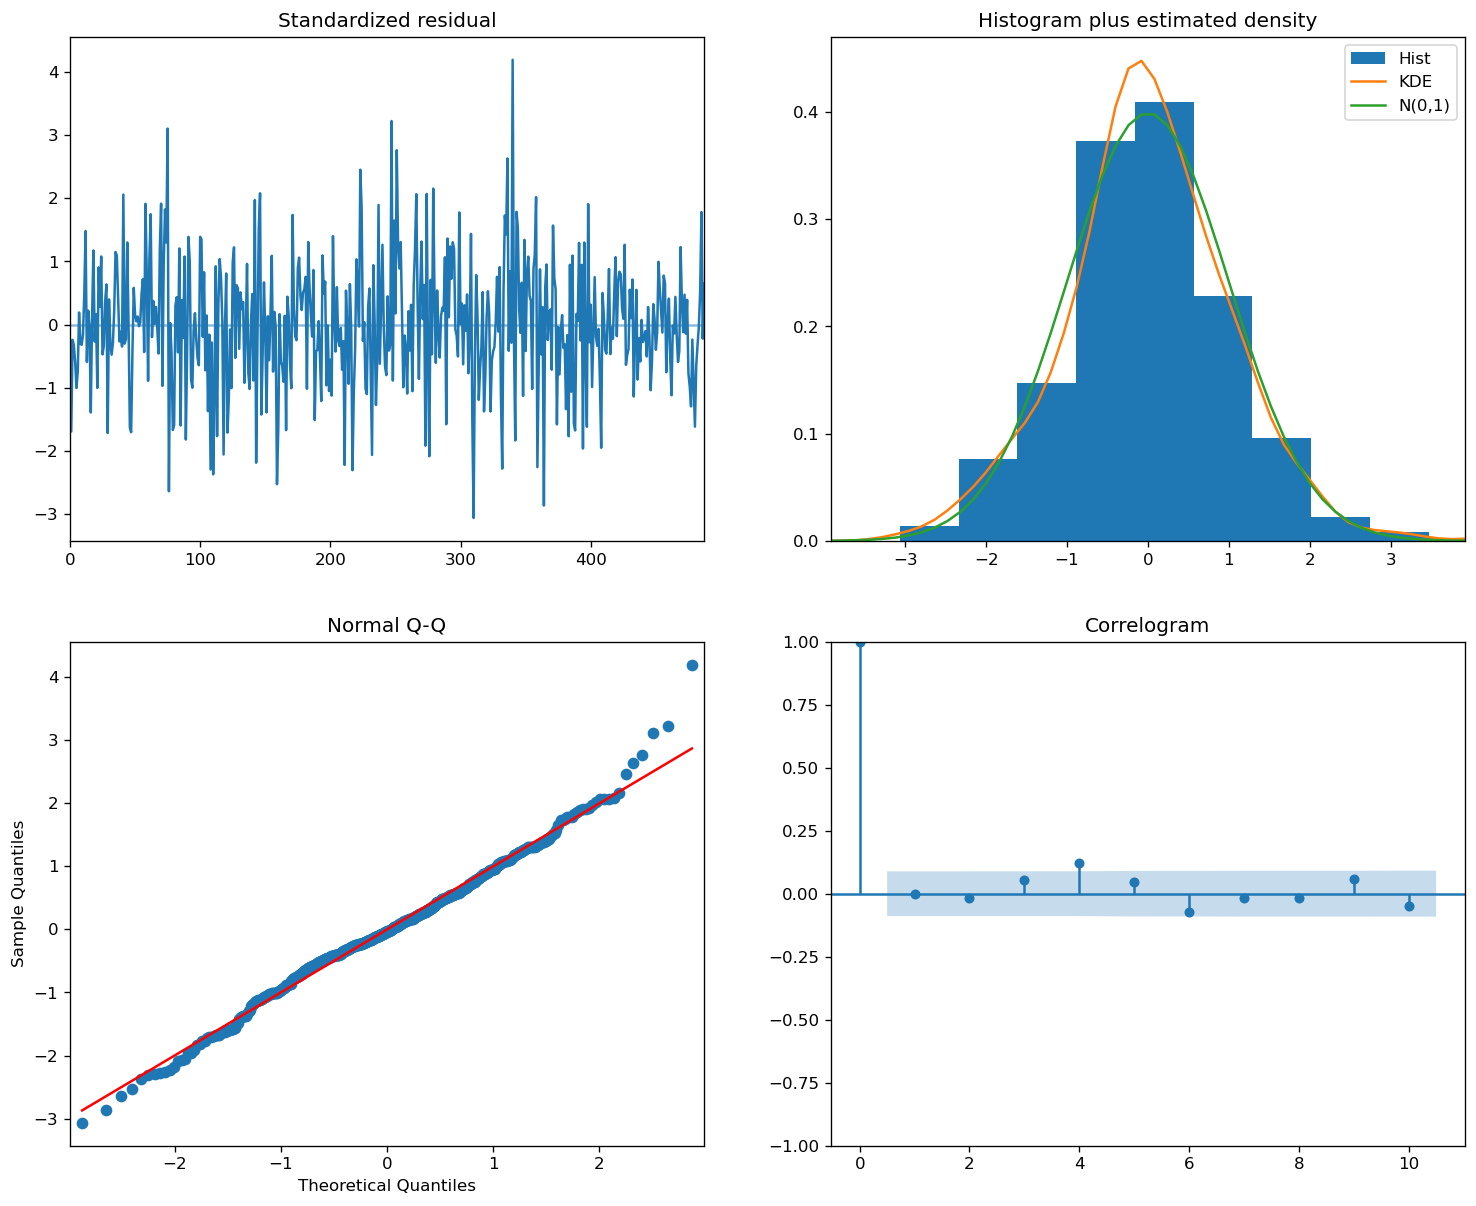

In [ ]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train2 = df.close[:375]
test2 = df.close[375:]

print(train2.shape, test2.shape)

(375,) (125,)


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              close   No. Observations:                  375
Model:             SARIMAX(1, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -1595.017
Date:                            Thu, 12 Oct 2023   AIC                           3198.034
Time:                                    00:21:58   BIC                           3213.611
Sample:                                         0   HQIC                          3204.226
                                            - 375                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9634      0.013     72.486      0.000       0.937       0.989
ar.S.L12      -0.6790      0.051   

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


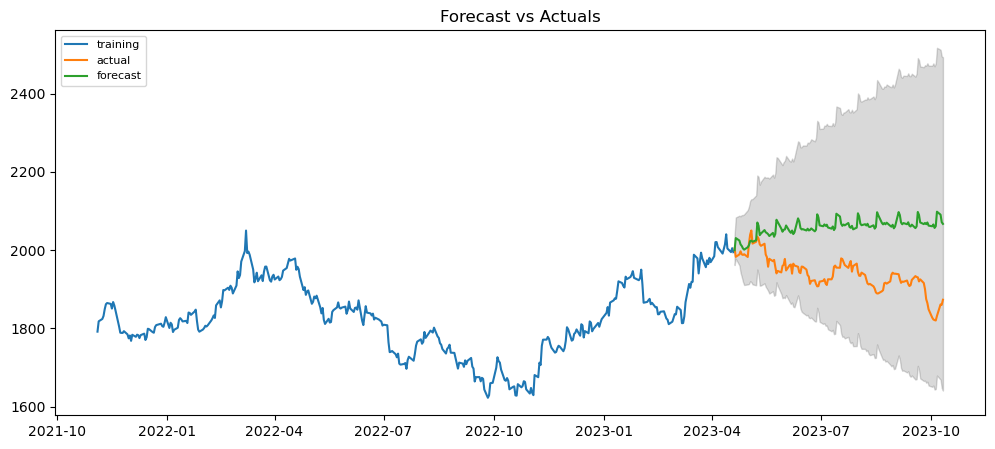

In [ ]:
import statsmodels.api as sm

# Build Model
model = sm.tsa.SARIMAX(train2, order=(1,0,0), seasonal_order=(2,1,0,12))
fitted = model.fit()
print(fitted.summary())

# Forecast
n_steps = test2.shape[0]
fc = fitted.forecast(n_steps, alpha=0.05)  # 95% conf
fc.index = test2.index

# get forecast with updated
forecast = fitted.get_forecast(test2.shape[0])

# Mean forecast
yhat = forecast.predicted_mean

# Confidence intervals of forecasts
conf = forecast.conf_int(alpha=0.05)
conf.index = test2.index

# Make as pandas series
fc_series = pd.Series(fc, index=test2.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test2.index)  # Use iloc to access the first column
upper_series = pd.Series(conf.iloc[:, 1], index=test2.index)  # Use iloc to access the second column

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train2, label='training')
plt.plot(test2, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Find Model Accuracy

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test2.values)

{'mape': 0.06253874362007161,
 'me': 119.12371880958923,
 'mae': 119.94429678938391,
 'mpe': 0.06213647172467228,
 'rmse': 132.74263949759217,
 'acf1': 0.9190188066571455,
 'corr': -0.5670750074957074,
 'minmax': 0.05806839511834394}

## Try Forecasting

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


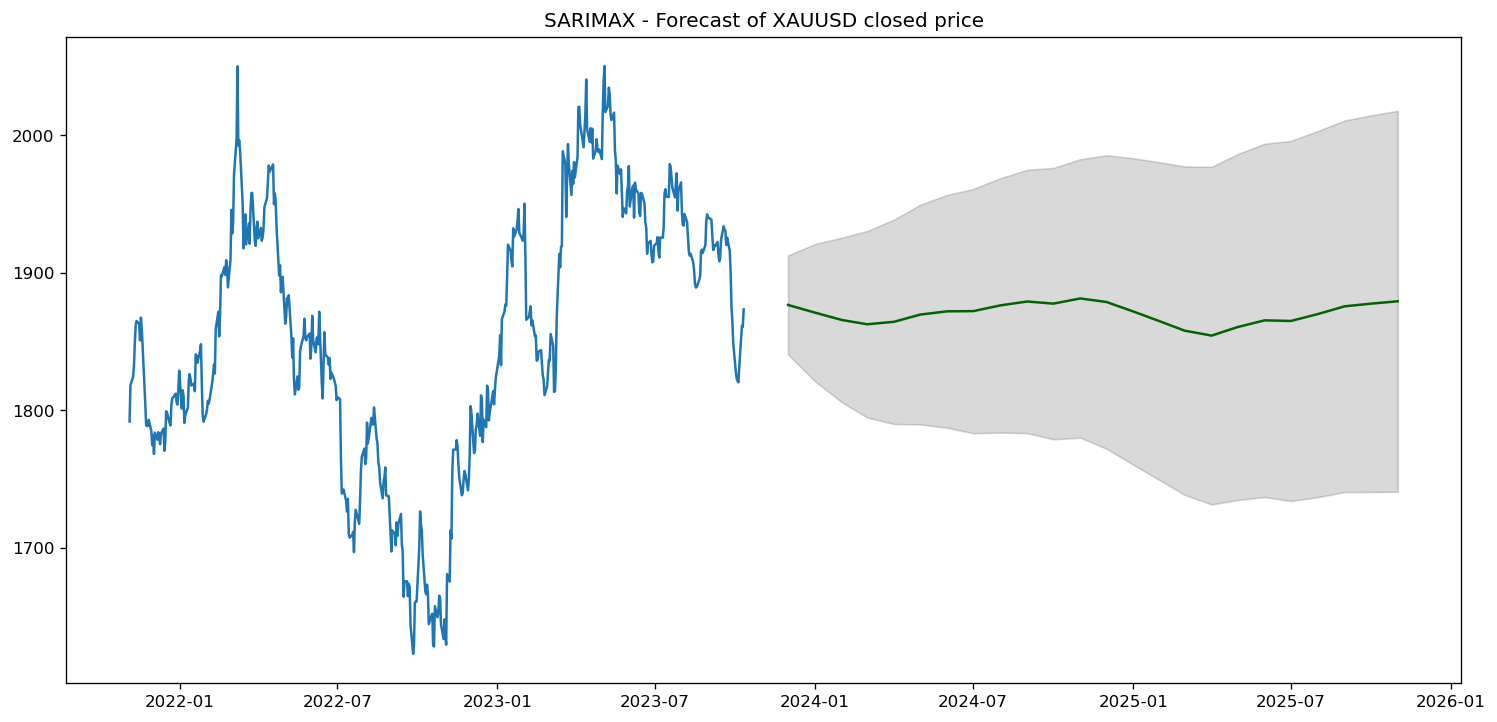

In [ ]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(df2.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(df2.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods,
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(df2.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted.index = index_of_fc
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(df2["close"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index,
                    lower_series,
                    upper_series,
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of XAUUSD closed price")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=24)

## <center>VAR - Vector AutoRegressive Model</center>

**What factors can affect the gold price?**

In theory, there is a lot of fundamental, macro, and sentimental factors that can impact the price of gold. On the fundamental side, there are demands from the central bank, jewellery buyers, and ETFs for physical gold whereas, in the macro space, there are inflation, interest rate, money supply and dollar strength. Also, some traders track CFTC net position data to gauge the sentiments of speculators.

![1%20hd0ediv3SFbmRkRfgWjFDw.webp](attachment:1%20hd0ediv3SFbmRkRfgWjFDw.webp)

The impact of the fundamental factors is the easiest to understand. The more gold governments and people purchase, the less gold there are in the market and the price should climb up.

In the macro space, the inflation (deflation) rate is a measure of the price increase (decrease) of a basket of goods and services. If the inflation rate rises, the price of our lunch and gold will rise as well. Conversely, if an interest rate rises, gold as an investment vehicle becomes unattractive relative to treasury bonds. Just like Buffett said, gold is a hen that does not lay any eggs.

One of the most important factors is money supply, which measures the total money available in an economy. Let’s cover two examples to explain why the increase in the money supply will increase the gold price.

    Imagine a small economy of you and your friends, who agree to use your monopoly money to buy and sell gold from each other. If you start to print the monopoly money in your garage and start buying all the gold from your friends, the price of gold relative to your monopoly will climb up. In other words, if the Fed starts to print tons of US dollar, the price of gold relative to the US dollar can climb up.
    Again imagine a small economy of you and your friends, who use the US dollar to trade. If you print money and give everybody free money, the price of goods and services will increase as the free money will be used to buy extra goods and services. The increase in the money supply ultimately circled back to the rise in the inflation rate so the price of gold can go up.

Last but not least, the strength of the US dollar can impact the price of gold and any other commodities denominated in US dollar. If the dollar becomes weak, other countries can buy more dollars and then more gold, driving up the gold price, and other commodities as long as they are quoted in dollars.

**How can we model the gold price?**

To model the gold price, we first gather the input data and apply data transformations. With the transformed data, we use a linear regression model to explain the relationship between the predictors and the gold price. To validate the model, an out-of-sample backtest is conducted and the R² value will be calculated to measure the performance of the model.

**Data Gathering**

To prepare for analysis and model development, the following data since 1981 are collected and cleaned:

    XAUUSD: gold spot price is denominated in the US dollar.
    US CPI: the index tracks changes in the price for goods and services paid by urban consumers (i.e. inflation rates).
    US M2: the money supply includes cash, checking deposits, and easily convertible money.
    US GDP: the featured metric measures the size of the US economic output.
    Dollar index: an index that tracks the value of the US dollar relative to a basket of foreign currencies.

In [ ]:
now = datetime.now()
print("now =", now)
data3=tv.get_hist(symbol='XAUUSD', exchange='OANDA', interval=Interval.in_daily, n_bars=5000)
data3

now = 2023-10-12 00:19:50.349072


,symbol,open,high,low,close,volume
datetime,,,,,,
2004-07-01 04:00:00,OANDA:XAUUSD,393.500,396.100,393.300,395.700,0.0
2004-07-02 04:00:00,OANDA:XAUUSD,395.800,400.800,388.400,397.800,0.0
2004-07-05 04:00:00,OANDA:XAUUSD,397.700,399.000,397.500,398.000,0.0
2004-07-06 04:00:00,OANDA:XAUUSD,398.000,399.100,388.900,392.400,0.0
2004-07-07 04:00:00,OANDA:XAUUSD,392.400,403.400,392.400,402.100,0.0
...,...,...,...,...,...,...
2023-10-05 04:00:00,OANDA:XAUUSD,1821.315,1829.225,1813.030,1820.300,139390.0
2023-10-06 04:00:00,OANDA:XAUUSD,1820.300,1834.920,1810.465,1832.035,163231.0
2023-10-09 04:00:00,OANDA:XAUUSD,1832.035,1863.550,1832.035,1861.405,129869.0


In [ ]:
df3 = data3.close
df3 = pd.DataFrame(df3)

df3.rename(columns={"close": "XAUUSD"}, inplace=True)
df3.head(5)

,XAUUSD
datetime,
2004-07-01 04:00:00,395.7
2004-07-02 04:00:00,397.8
2004-07-05 04:00:00,398.0
2004-07-06 04:00:00,392.4
2004-07-07 04:00:00,402.1


In [ ]:
df3.reset_index(inplace=True)
df3.head(5)

,datetime,XAUUSD
0,2004-07-01 04:00:00,395.7
1,2004-07-02 04:00:00,397.8
2,2004-07-05 04:00:00,398.0
3,2004-07-06 04:00:00,392.4
4,2004-07-07 04:00:00,402.1


In [ ]:
df3['DATE'] = df3['datetime'].dt.normalize()

df3.set_index('DATE', inplace=True)

In [ ]:
df3 = df3.drop("datetime", axis=1)
df3.head(5)

,XAUUSD
DATE,
2004-07-01,395.7
2004-07-02,397.8
2004-07-05,398.0
2004-07-06,392.4
2004-07-07,402.1


In [ ]:
now = datetime.now()
print("now =", now)
data3_DXY = tv.get_hist(symbol='DXY', exchange='TVC', interval=Interval.in_daily, n_bars=5000)
data3_DXY

now = 2023-10-12 00:19:51.967513


,symbol,open,high,low,close,volume
datetime,,,,,,
2004-07-21 06:00:00,TVC:DXY,87.820,88.770,87.740,88.560,0.0
2004-07-22 06:00:00,TVC:DXY,88.420,88.610,88.110,88.450,0.0
2004-07-23 06:00:00,TVC:DXY,88.380,89.320,88.320,89.260,0.0
2004-07-26 04:00:00,TVC:DXY,89.220,89.310,88.790,89.030,0.0
2004-07-27 06:00:00,TVC:DXY,89.060,89.850,88.760,89.790,0.0
...,...,...,...,...,...,...
2023-10-05 06:00:00,TVC:DXY,106.768,106.857,106.322,106.339,0.0
2023-10-06 06:00:00,TVC:DXY,106.364,106.974,105.952,106.101,0.0
2023-10-09 04:00:00,TVC:DXY,106.101,106.600,106.024,106.064,0.0


In [ ]:
data3_DXY.reset_index(inplace=True)
data3_DXY['DATE'] = data3_DXY['datetime'].dt.normalize()

data3_DXY.set_index('DATE', inplace=True)
data3_DXY = data3_DXY.drop("datetime", axis=1)

data3_DXY.head(5)

,symbol,open,high,low,close,volume
DATE,,,,,,
2004-07-21,TVC:DXY,87.82,88.77,87.74,88.56,0.0
2004-07-22,TVC:DXY,88.42,88.61,88.11,88.45,0.0
2004-07-23,TVC:DXY,88.38,89.32,88.32,89.26,0.0
2004-07-26,TVC:DXY,89.22,89.31,88.79,89.03,0.0
2004-07-27,TVC:DXY,89.06,89.85,88.76,89.79,0.0


In [ ]:
CPIAUCSL = pd.read_csv("CPIAUCSL.csv")
M2 = pd.read_csv("WM2NS.csv")
GDP = pd.read_csv("GDP.csv")

In [ ]:
CPIAUCSL.head(5)

,DATE,CPIAUCSL
0,2004-07-01,189.1
1,2004-08-01,189.2
2,2004-09-01,189.8
3,2004-10-01,190.8
4,2004-11-01,191.7


In [ ]:
CPIAUCSL.set_index(pd.to_datetime(CPIAUCSL['DATE']), inplace=True)

In [ ]:
M2.head(5)

,DATE,WM2NS
0,2004-07-05,6302.8
1,2004-07-12,6302.9
2,2004-07-19,6276.1
3,2004-07-26,6240.6
4,2004-08-02,6277.5


In [ ]:
M2.set_index(pd.to_datetime(M2['DATE']), inplace=True)

In [ ]:
GDP.head(5)

,DATE,GDP
0,2004-07-01,12305.307
1,2004-10-01,12527.214
2,2005-01-01,12767.286
3,2005-04-01,12922.656
4,2005-07-01,13142.642


In [ ]:
GDP.set_index(pd.to_datetime(GDP['DATE']), inplace=True)

In [ ]:
df3["CPIAUCSL"] = CPIAUCSL["CPIAUCSL"]
df3["M2"] = M2["WM2NS"]
df3["GDP"] = GDP["GDP"]
df3["DXY"] = data3_DXY["close"]

In [ ]:
df3.shape

(5000, 5)

In [ ]:
df3.tail(5)

,XAUUSD,CPIAUCSL,M2,GDP,DXY
DATE,,,,,
2023-10-05,1820.300,NaN,NaN,NaN,106.339
2023-10-06,1832.035,NaN,NaN,NaN,106.101
2023-10-09,1861.405,NaN,NaN,NaN,106.064
2023-10-10,1860.460,NaN,NaN,NaN,105.772
2023-10-11,1873.630,NaN,NaN,NaN,105.873


In [ ]:
df3.columns

Index(['XAUUSD', 'CPIAUCSL', 'M2', 'GDP', 'DXY'], dtype='object')

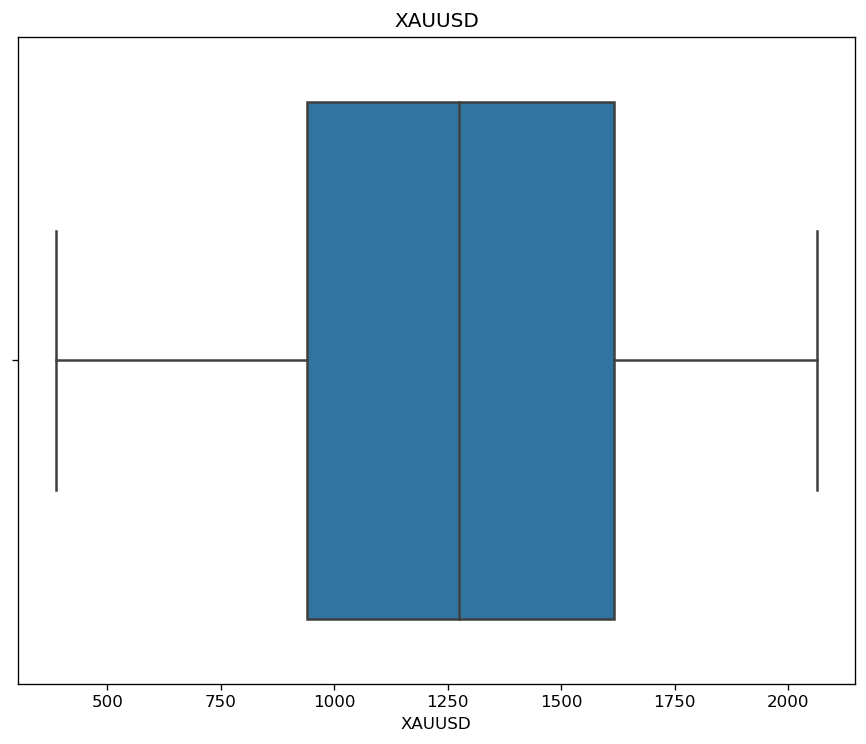

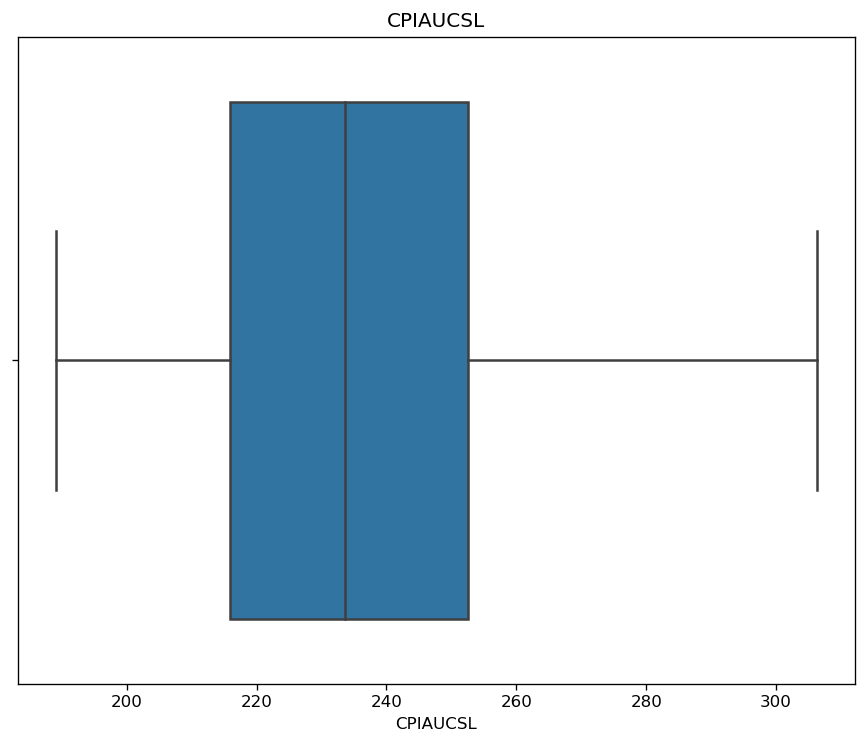

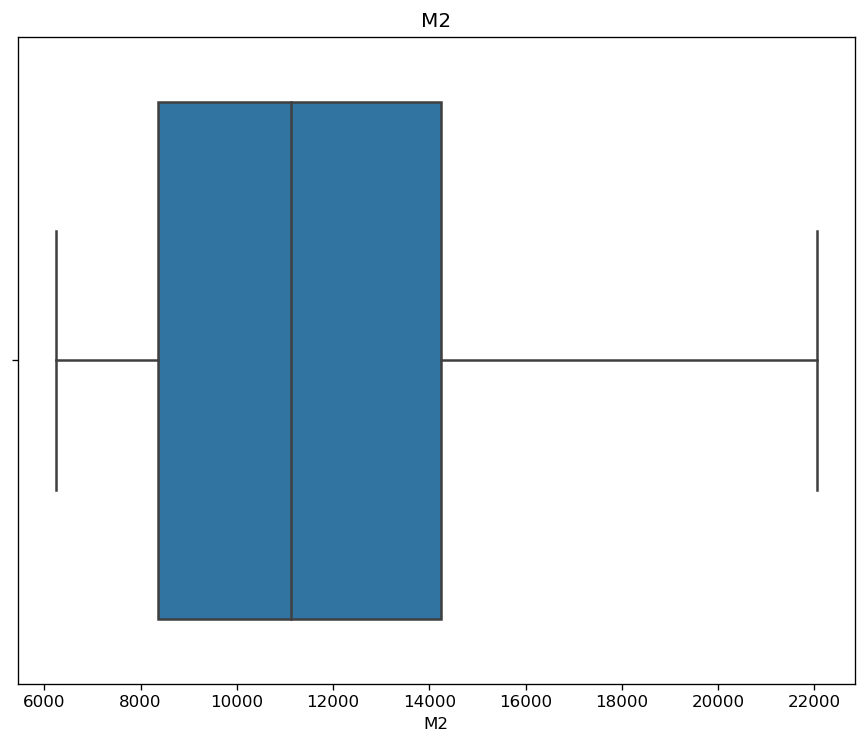

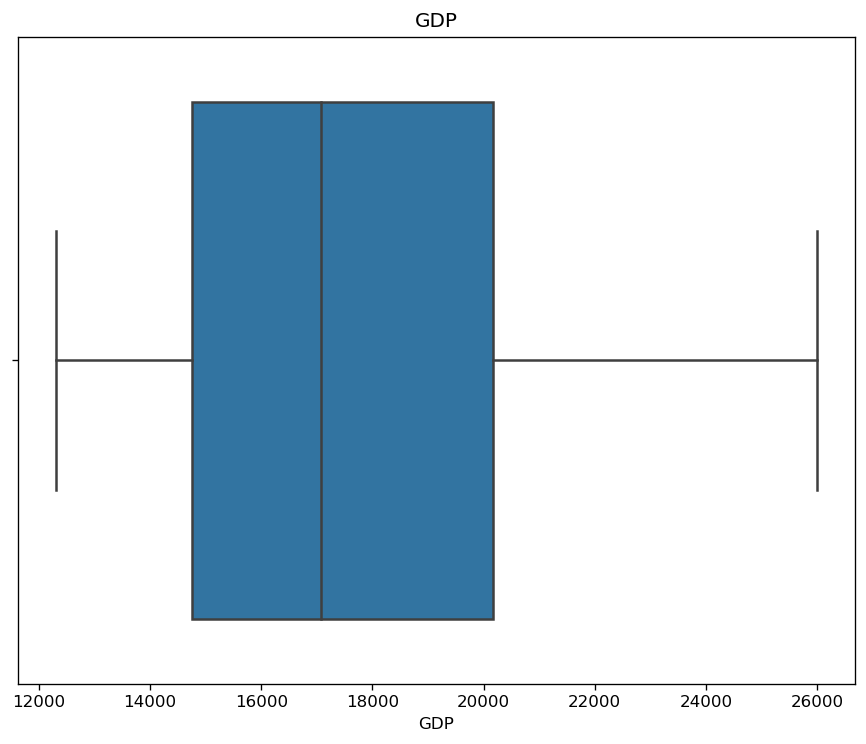

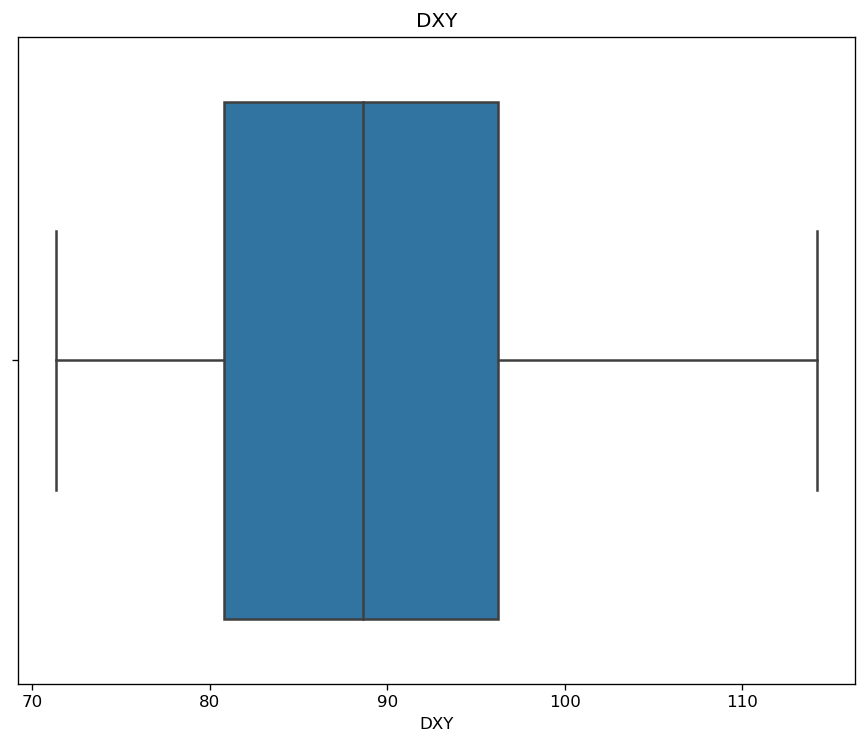

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Using Box Plot to see Outliers

for feature in df3.columns:
  plt.title(feature,fontsize=12)
  sns.boxplot(df3[feature])
  plt.show()

In [ ]:
'''
# Compute the mean of each column
column_means = df3.mean()

# Fill missing values with the respective column mean
df3_filled = df3.fillna(column_means)

# Display the DataFrame with missing values filled
df3_filled.head(5)
'''

# Fill Missing value with the previous non-missing value
df3_filled = df3.fillna(method='ffill').dropna()
df3_filled.head(5)

,XAUUSD,CPIAUCSL,M2,GDP,DXY
DATE,,,,,
2004-07-21,396.6,189.1,6276.1,12305.307,88.56
2004-07-22,393.6,189.1,6276.1,12305.307,88.45
2004-07-23,389.9,189.1,6276.1,12305.307,89.26
2004-07-26,388.5,189.1,6240.6,12305.307,89.03
2004-07-27,386.9,189.1,6240.6,12305.307,89.79


In [ ]:
df3_filled.shape

(4986, 5)

In [ ]:
df3_filled.tail(5)

,XAUUSD,CPIAUCSL,M2,GDP,DXY
DATE,,,,,
2023-10-05,1820.300,306.269,20785.9,25994.639,106.339
2023-10-06,1832.035,306.269,20785.9,25994.639,106.101
2023-10-09,1861.405,306.269,20785.9,25994.639,106.064
2023-10-10,1860.460,306.269,20785.9,25994.639,105.772
2023-10-11,1873.630,306.269,20785.9,25994.639,105.873


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df3_scaled = df3_filled.copy()

for _ in df3_scaled.columns:
    df3_scaled[_] = scaler.fit_transform(df3_scaled[[_]])

In [ ]:
df3_scaled.head(5)

,XAUUSD,CPIAUCSL,M2,GDP,DXY
DATE,,,,,
2004-07-21,0.005786,0.0,0.002245,0.0,0.402053
2004-07-22,0.003997,0.0,0.002245,0.0,0.399487
2004-07-23,0.001790,0.0,0.002245,0.0,0.418385
2004-07-26,0.000954,0.0,0.000000,0.0,0.413019
2004-07-27,0.000000,0.0,0.000000,0.0,0.430751


<AxesSubplot:>

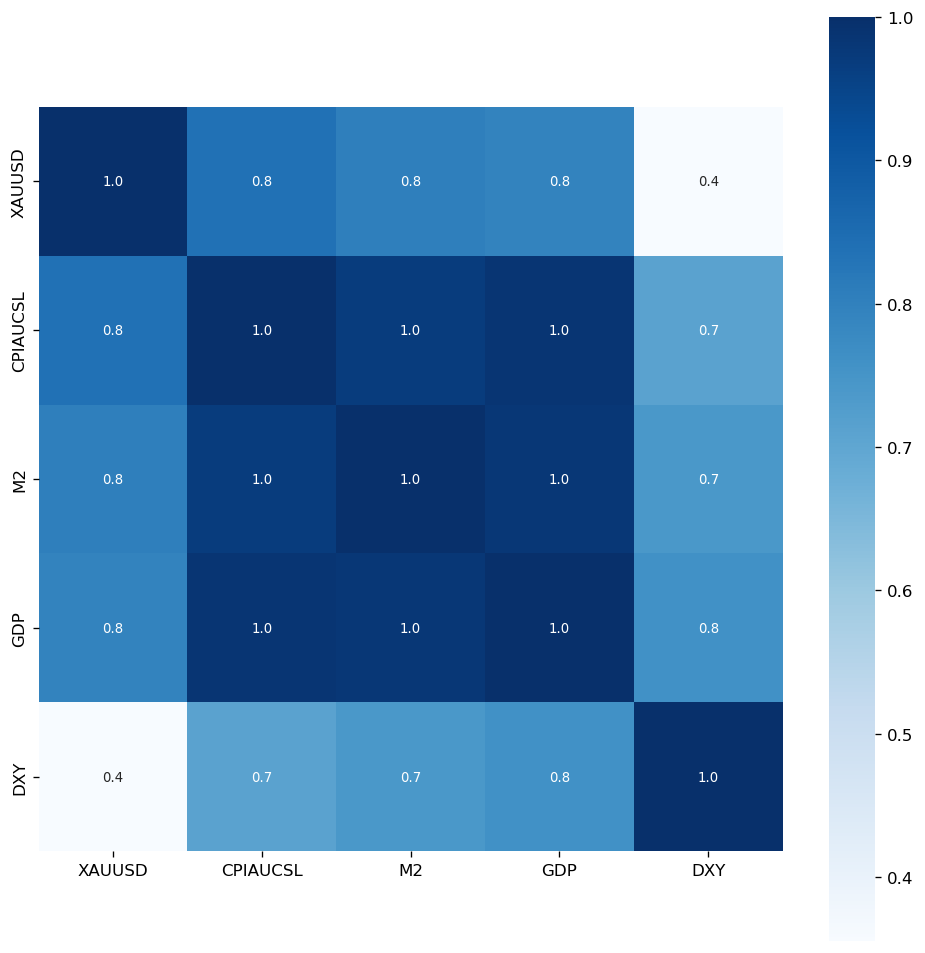

In [ ]:
# Correlation
# Constructing a Heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(df3_scaled.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

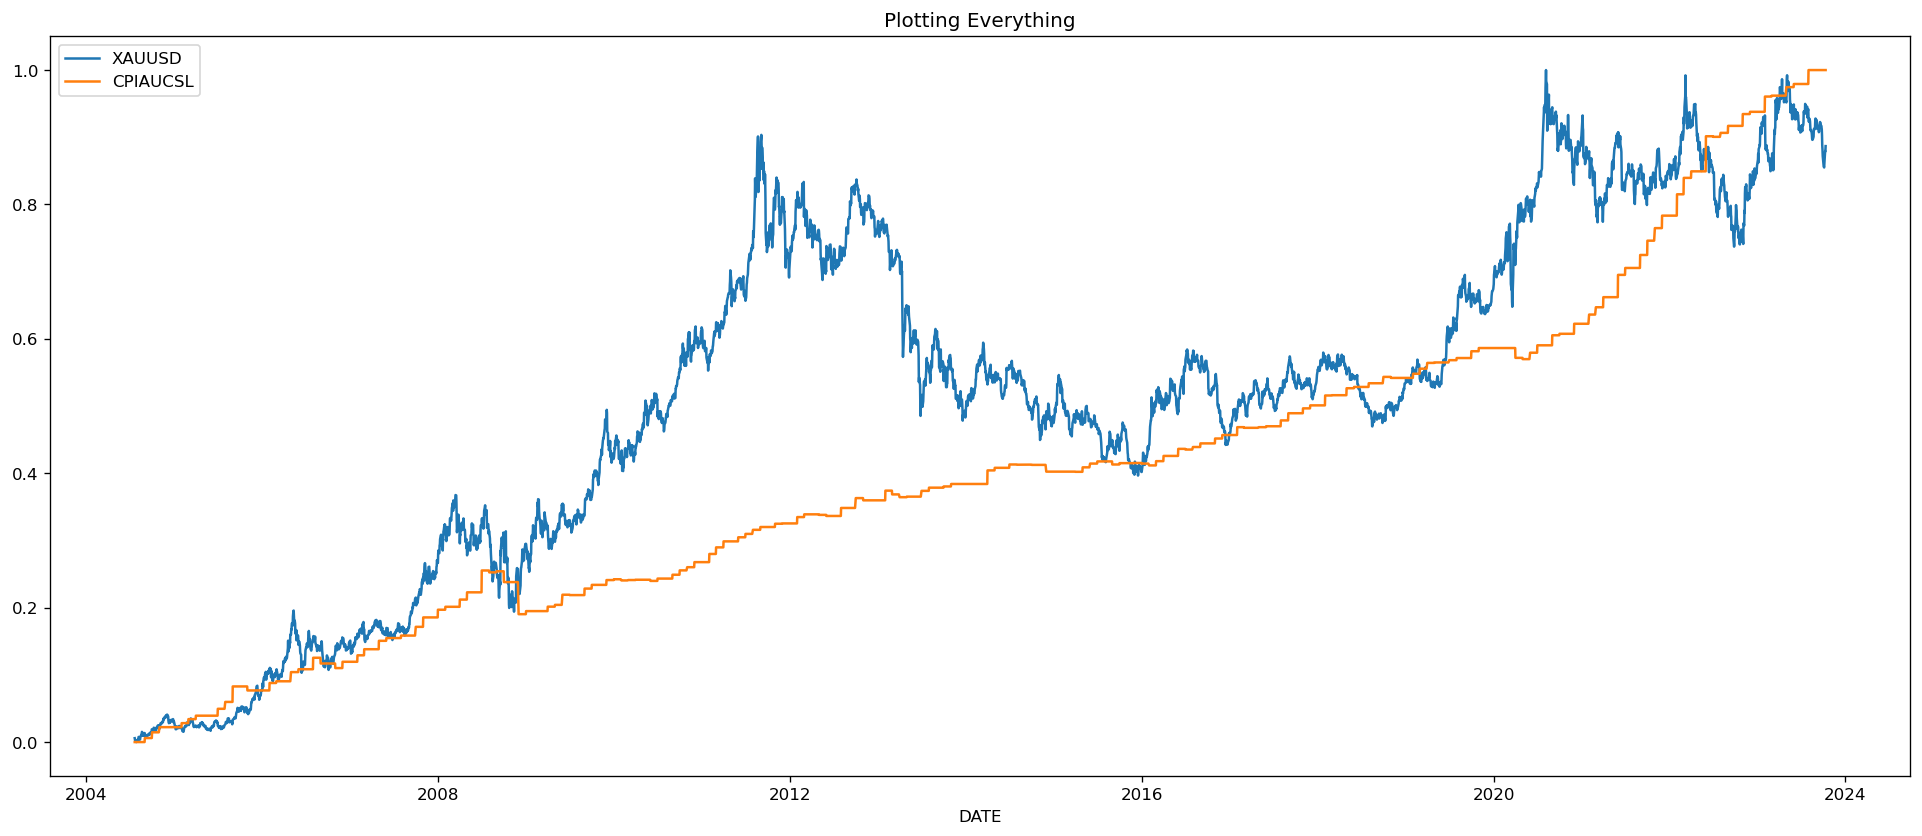

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
# Plotting two variables
plt.plot(df3_scaled.XAUUSD, label='XAUUSD')
plt.plot(df3_scaled.CPIAUCSL, label='CPIAUCSL')
#plt.plot(df3_scaled.M2, label='M2')
#plt.plot(df3_scaled.GDP, label='GDP')
#plt.plot(df3_scaled.DXY, label='DXY')

# Adding labels and title
plt.xlabel('DATE')
plt.ylabel('')
plt.title('Plotting Everything')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

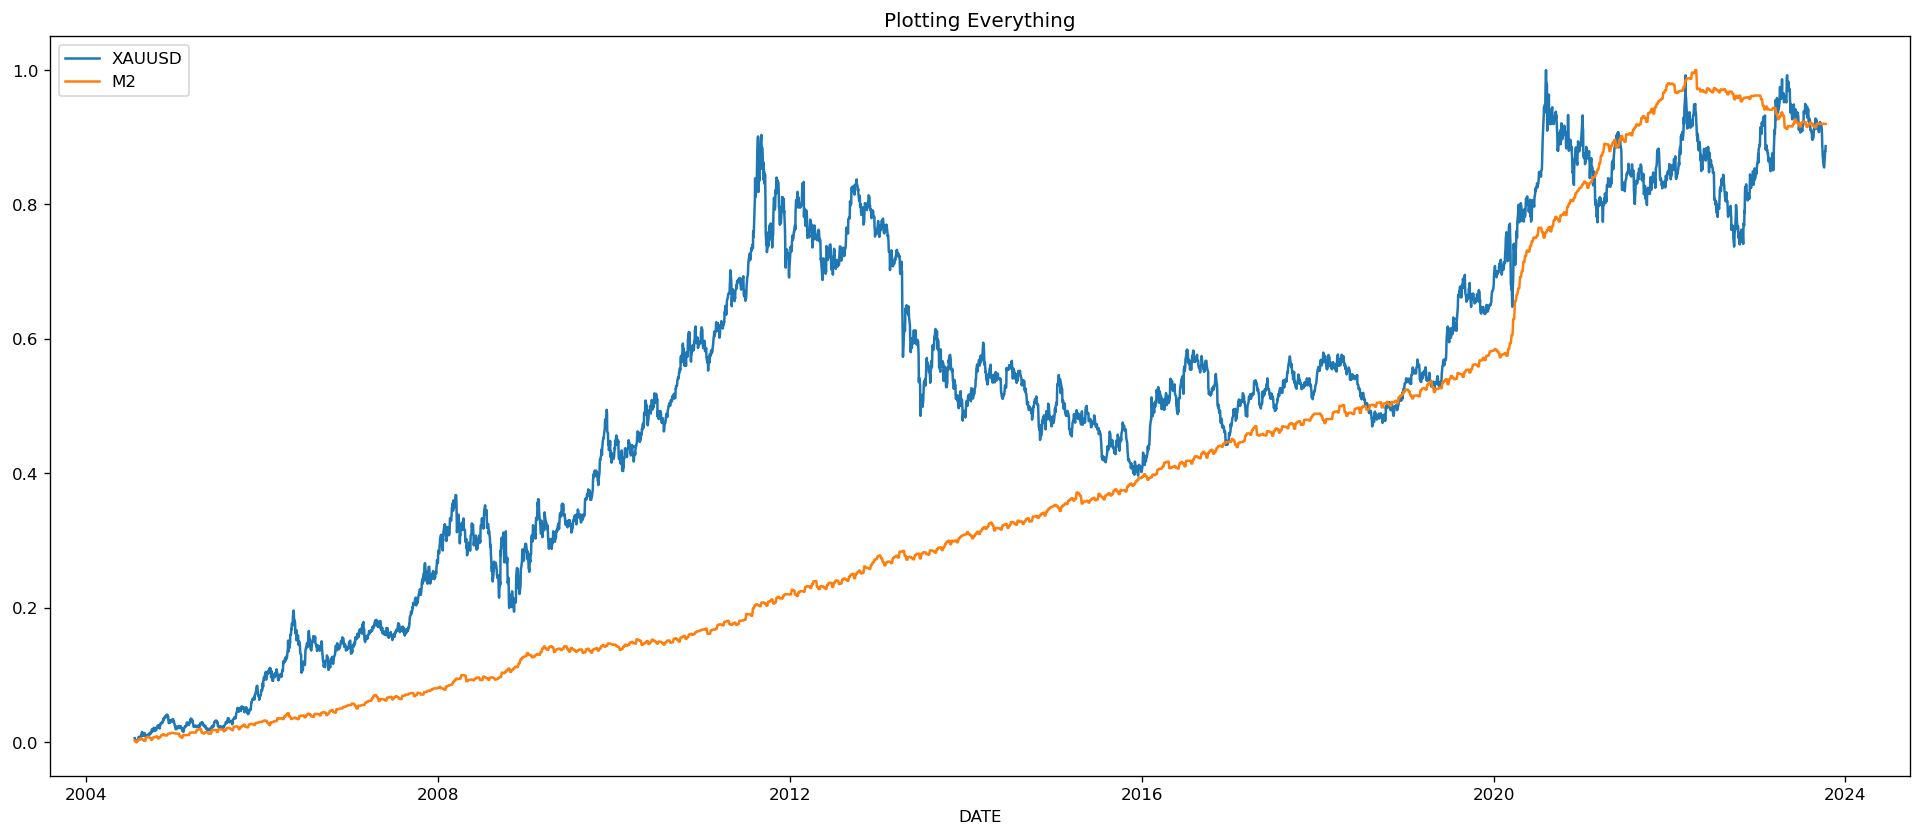

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
# Plotting two variables
plt.plot(df3_scaled.XAUUSD, label='XAUUSD')
#plt.plot(df3_scaled.CPIAUCSL, label='CPIAUCSL')
plt.plot(df3_scaled.M2, label='M2')
#plt.plot(df3_scaled.GDP, label='GDP')
#plt.plot(df3_scaled.DXY, label='DXY')

# Adding labels and title
plt.xlabel('DATE')
plt.ylabel('')
plt.title('Plotting Everything')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

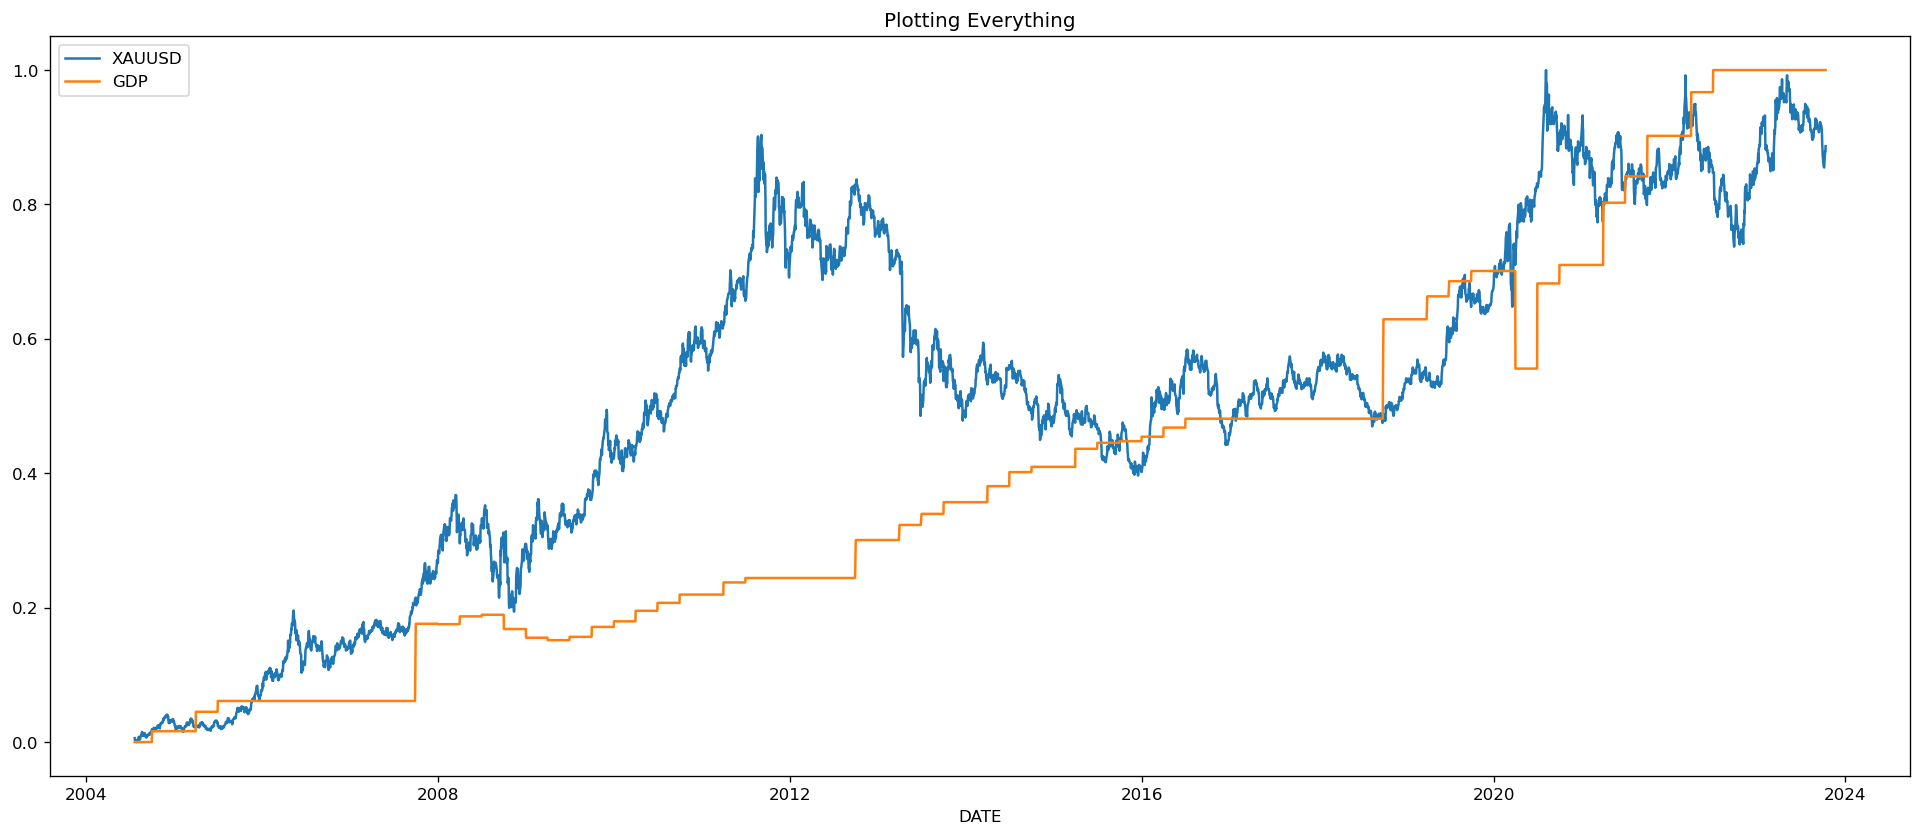

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
# Plotting two variables
plt.plot(df3_scaled.XAUUSD, label='XAUUSD')
#plt.plot(df3_scaled.CPIAUCSL, label='CPIAUCSL')
#plt.plot(df3_scaled.M2, label='M2')
plt.plot(df3_scaled.GDP, label='GDP')
#plt.plot(df3_scaled.DXY, label='DXY')

# Adding labels and title
plt.xlabel('DATE')
plt.ylabel('')
plt.title('Plotting Everything')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

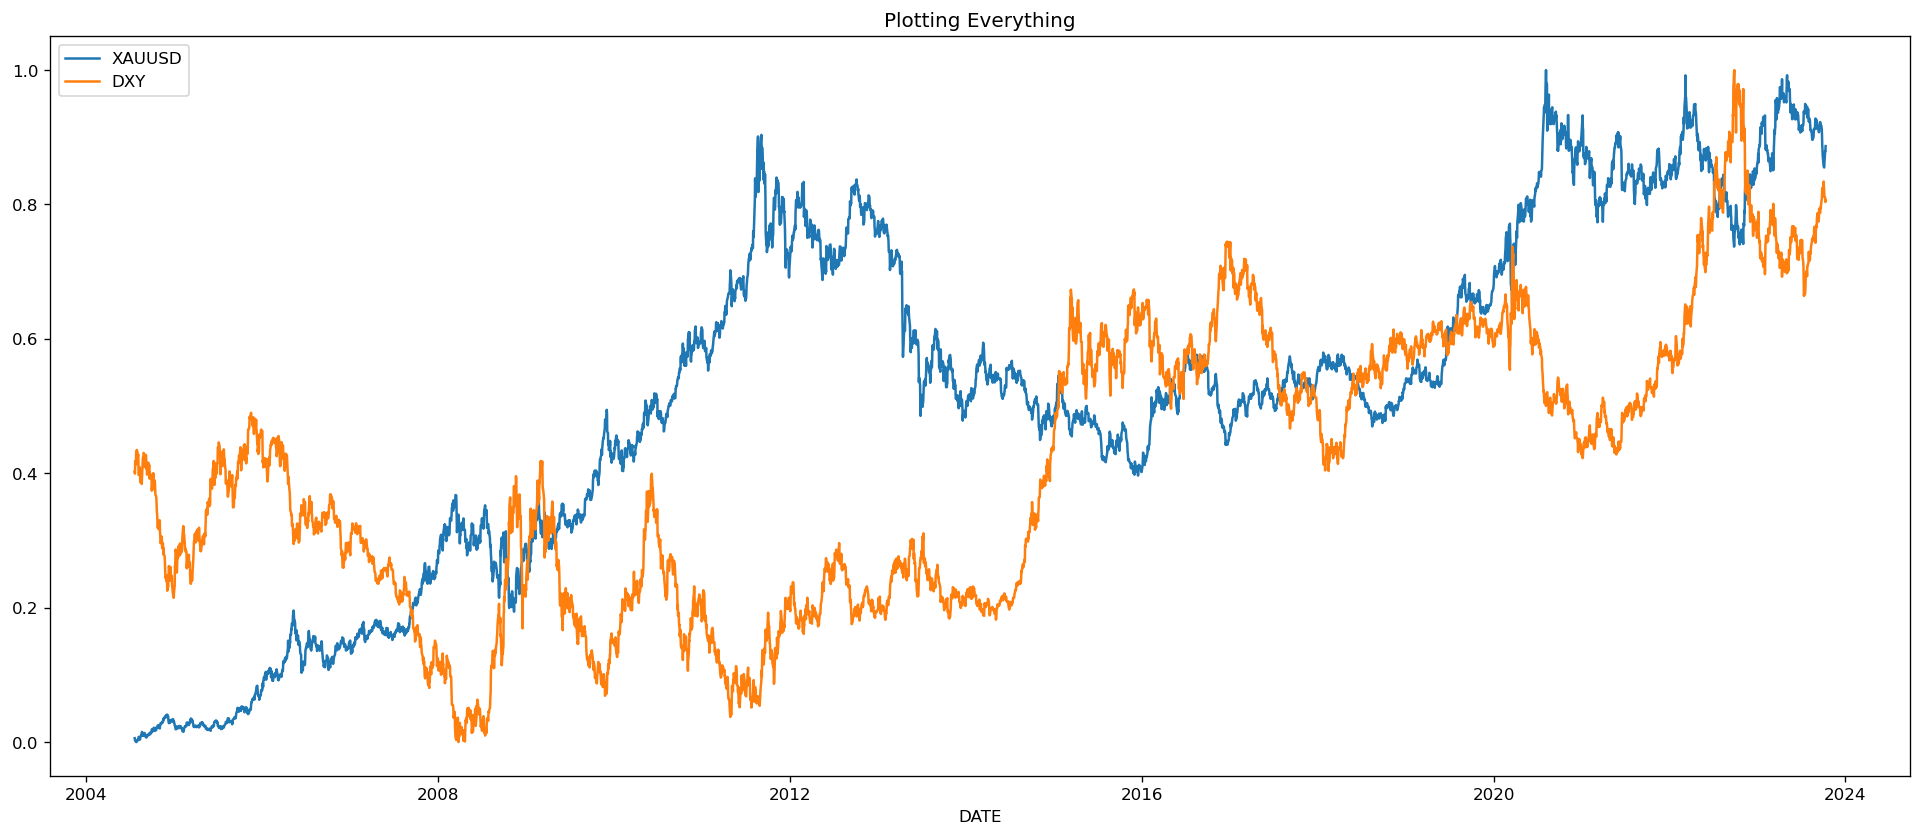

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,8))
# Plotting two variables
plt.plot(df3_scaled.XAUUSD, label='XAUUSD')
#plt.plot(df3_scaled.CPIAUCSL, label='CPIAUCSL')
#plt.plot(df3_scaled.M2, label='M2')
#plt.plot(df3_scaled.GDP, label='GDP')
plt.plot(df3_scaled.DXY, label='DXY')

# Adding labels and title
plt.xlabel('DATE')
plt.ylabel('')
plt.title('Plotting Everything')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

<AxesSubplot:xlabel='DATE'>

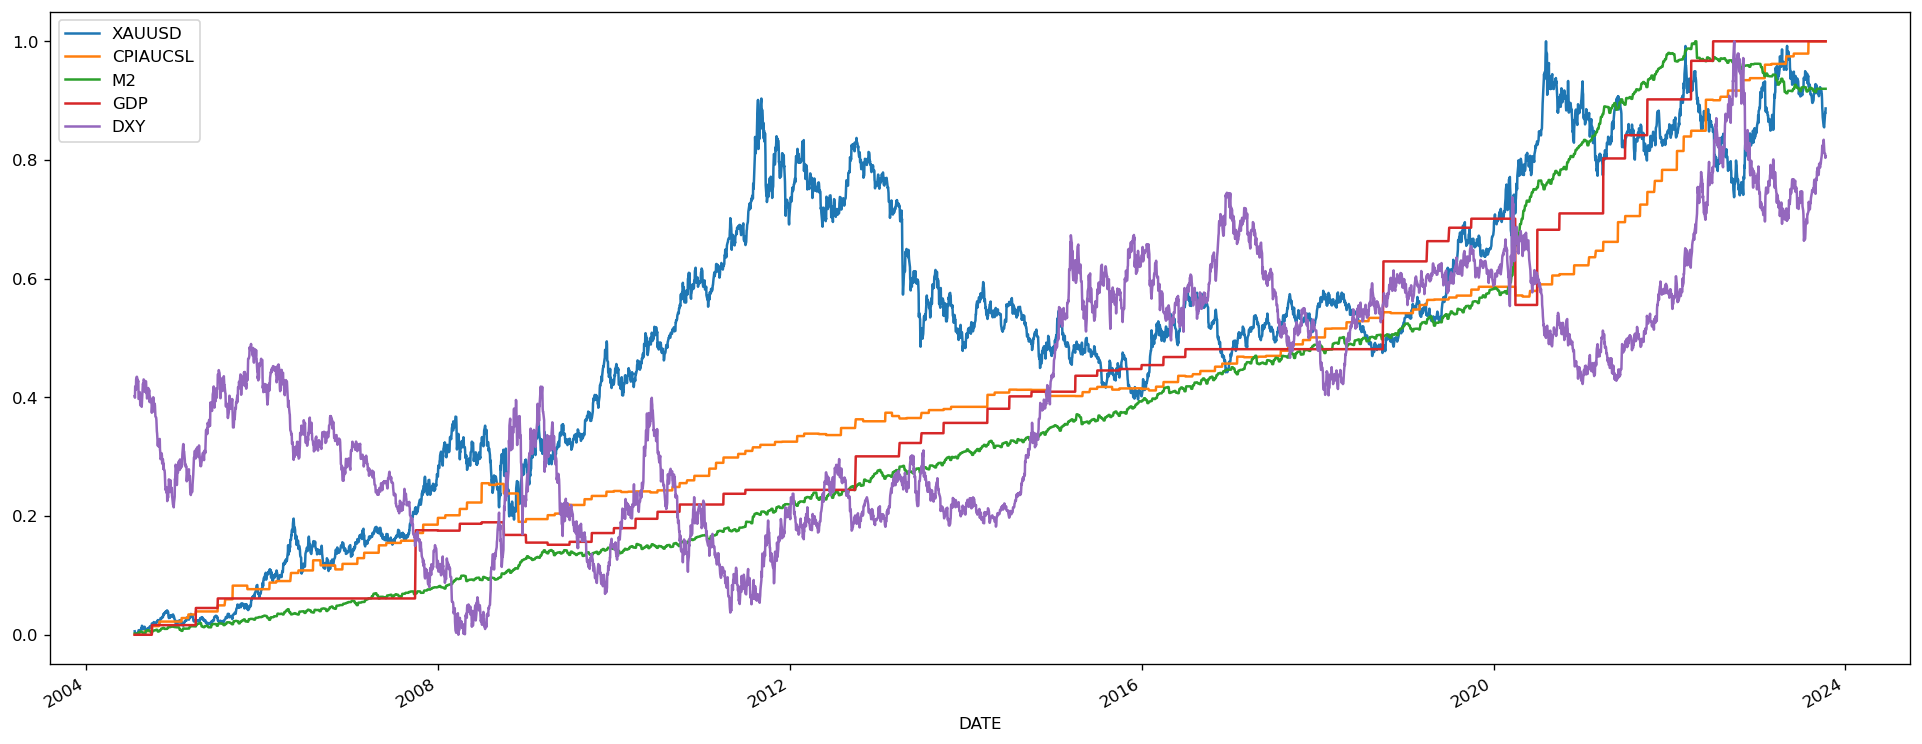

In [ ]:
df3_scaled.plot(figsize=(20, 8))

In [ ]:
# Stationary data creation by taking natural element-wise logarithm
# and then calculating the differences between subsequent values.
df3_process = df3_filled.diff().dropna()
df3_process

,XAUUSD,CPIAUCSL,M2,GDP,DXY
DATE,,,,,
2004-07-22,-3.000,0.0,0.0,0.0,-0.110
2004-07-23,-3.700,0.0,0.0,0.0,0.810
2004-07-26,-1.400,0.0,-35.5,0.0,-0.230
2004-07-27,-1.600,0.0,0.0,0.0,0.760
2004-07-28,0.500,0.0,0.0,0.0,-0.040
...,...,...,...,...,...
2023-10-05,-1.015,0.0,0.0,0.0,-0.434
2023-10-06,11.735,0.0,0.0,0.0,-0.238
2023-10-09,29.370,0.0,0.0,0.0,-0.037


<AxesSubplot:xlabel='DATE'>

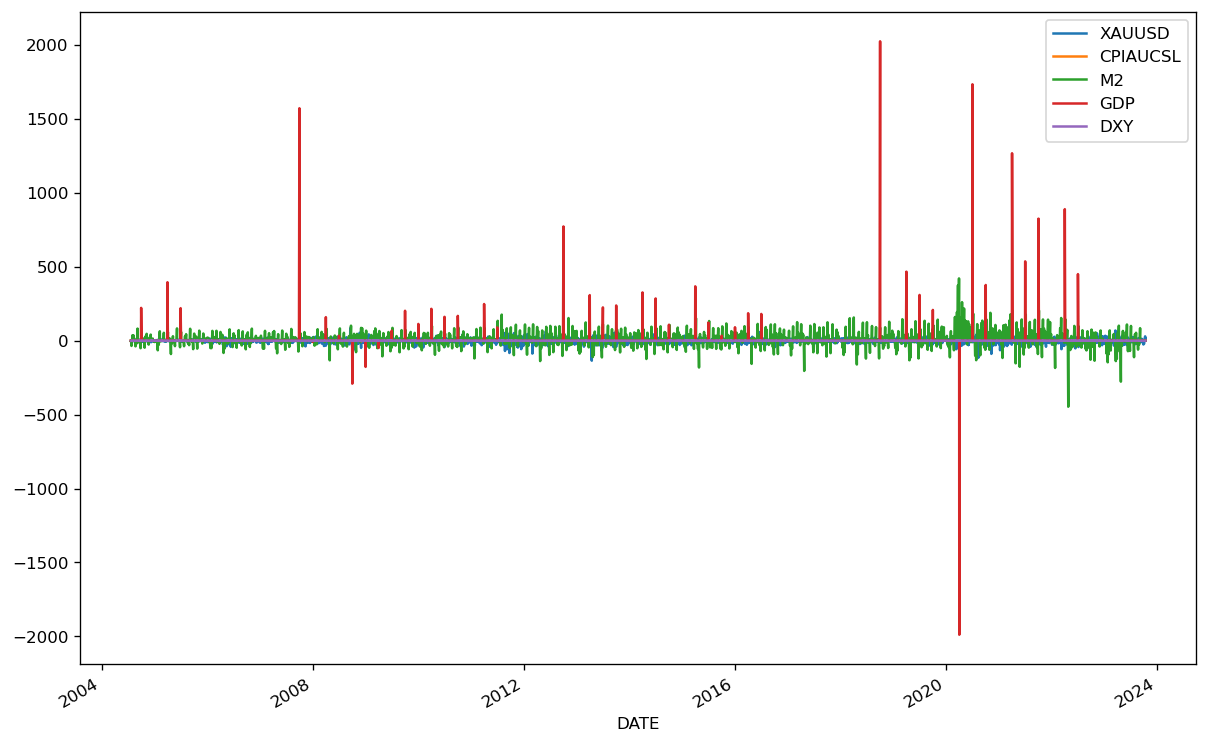

In [ ]:
df3_process.plot(figsize=(12, 8))

In [ ]:
# Create a VAR model
from statsmodels.tsa.api import VAR
model = VAR(df3_process)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Selecting the Lag Order:

Lag order means the number of previous time periods the model will use. Selecting the right lag length is important to create a better model. Higher lag order/overfitting or lower lag order/underfitting can introduce errors into the model. Most appropriate lag order is selected based on the minimum values of the following criterion:

In [ ]:
order = model.select_order()
order.summary()

,AIC,BIC,FPE,HQIC
0,15.46,15.47*,5.194e+06,15.47
1,15.46,15.50,5.175e+06,15.47
2,15.46,15.53,5.167e+06,15.48
3,15.46,15.56,5.169e+06,15.49
4,15.46,15.59,5.157e+06,15.50
5,15.44,15.61,5.065e+06,15.50
6,15.43,15.63,5.008e+06,15.50
7,15.42,15.65,4.967e+06,15.50
8,15.42,15.69,4.974e+06,15.51
9,15.42,15.73,5.000e+06,15.53


As the lag order = 30 contains most minimums, we’ll select this.

In [ ]:
# Fit the VAR model, returns the Estimation results
estimation_results = model.fit(30)# Compute output summary of estimates
estimation_results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 12, Oct, 2023
Time:                     00:19:57
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    16.1000
Nobs:                     4955.00    HQIC:                   15.4560
Log likelihood:          -71830.1    FPE:                3.64334e+06
AIC:                      15.1083    Det(Omega_mle):     3.13555e+06
--------------------------------------------------------------------
Results for equation XAUUSD
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.273992         0.254768            1.075           0.282
L1.XAUUSD            0.010572         0.015728            0.672           0.501
L1.CPIAUCSL          0.935964         0.869279            1.077

Forecasting

In this step, we’ll use the estimator created in the previous step to forecast for the required forecasting period.

In [ ]:
# Calculate the prediction start/first month
prediction_start_month = (df3_process.index[-1] + pd.DateOffset(months=1)).strftime('%Y-%m-%d')# Total forecasting period considered
forecastingPeriod = 24

In [ ]:
# Fetch the lag order
lag_order = estimation_results.k_ar # Produce forecasts for desired number of steps ahead
predictions = estimation_results.forecast(df3_process.values[-lag_order:], forecastingPeriod) # Converts NumPy multidimensional array into Pandas DataFrame
predictionsDF = pd.DataFrame(predictions) # Assign the column headers
predictionsDF.columns = ['XAUUSD', 'CPIAUCSL', 'M2', 'GDP', 'DXY']
XAUUSD_PredDF = predictionsDF['XAUUSD']
XAUUSD_PredDF

0     0.014747
1    -2.005032
2    -1.543204
3    -1.188428
4     0.139614
5    -0.708626
6     1.073252
7     0.864710
8     2.393034
9     1.323807
10    1.707816
11    1.378926
12    1.466830
13    1.790822
14    0.184354
15    1.180764
16    0.204065
17   -0.277341
18   -0.924667
19   -0.776305
20   -0.576272
21   -0.091446
22   -0.967063
23   -0.516841
Name: XAUUSD, dtype: float64

In [ ]:
# We’ll include dates with the estimated values for better visualization.

# Create a DateTimeIndex
prediction_date_range = pd.date_range(prediction_start_month, periods=forecastingPeriod, freq='MS') # Assign the DateTimeIndex as DataFrame index
XAUUSD_PredDF.index = prediction_date_range
XAUUSD_PredDF

2023-12-01    0.014747
2024-01-01   -2.005032
2024-02-01   -1.543204
2024-03-01   -1.188428
2024-04-01    0.139614
2024-05-01   -0.708626
2024-06-01    1.073252
2024-07-01    0.864710
2024-08-01    2.393034
2024-09-01    1.323807
2024-10-01    1.707816
2024-11-01    1.378926
2024-12-01    1.466830
2025-01-01    1.790822
2025-02-01    0.184354
2025-03-01    1.180764
2025-04-01    0.204065
2025-05-01   -0.277341
2025-06-01   -0.924667
2025-07-01   -0.776305
2025-08-01   -0.576272
2025-09-01   -0.091446
2025-10-01   -0.967063
2025-11-01   -0.516841
Freq: MS, Name: XAUUSD, dtype: float64

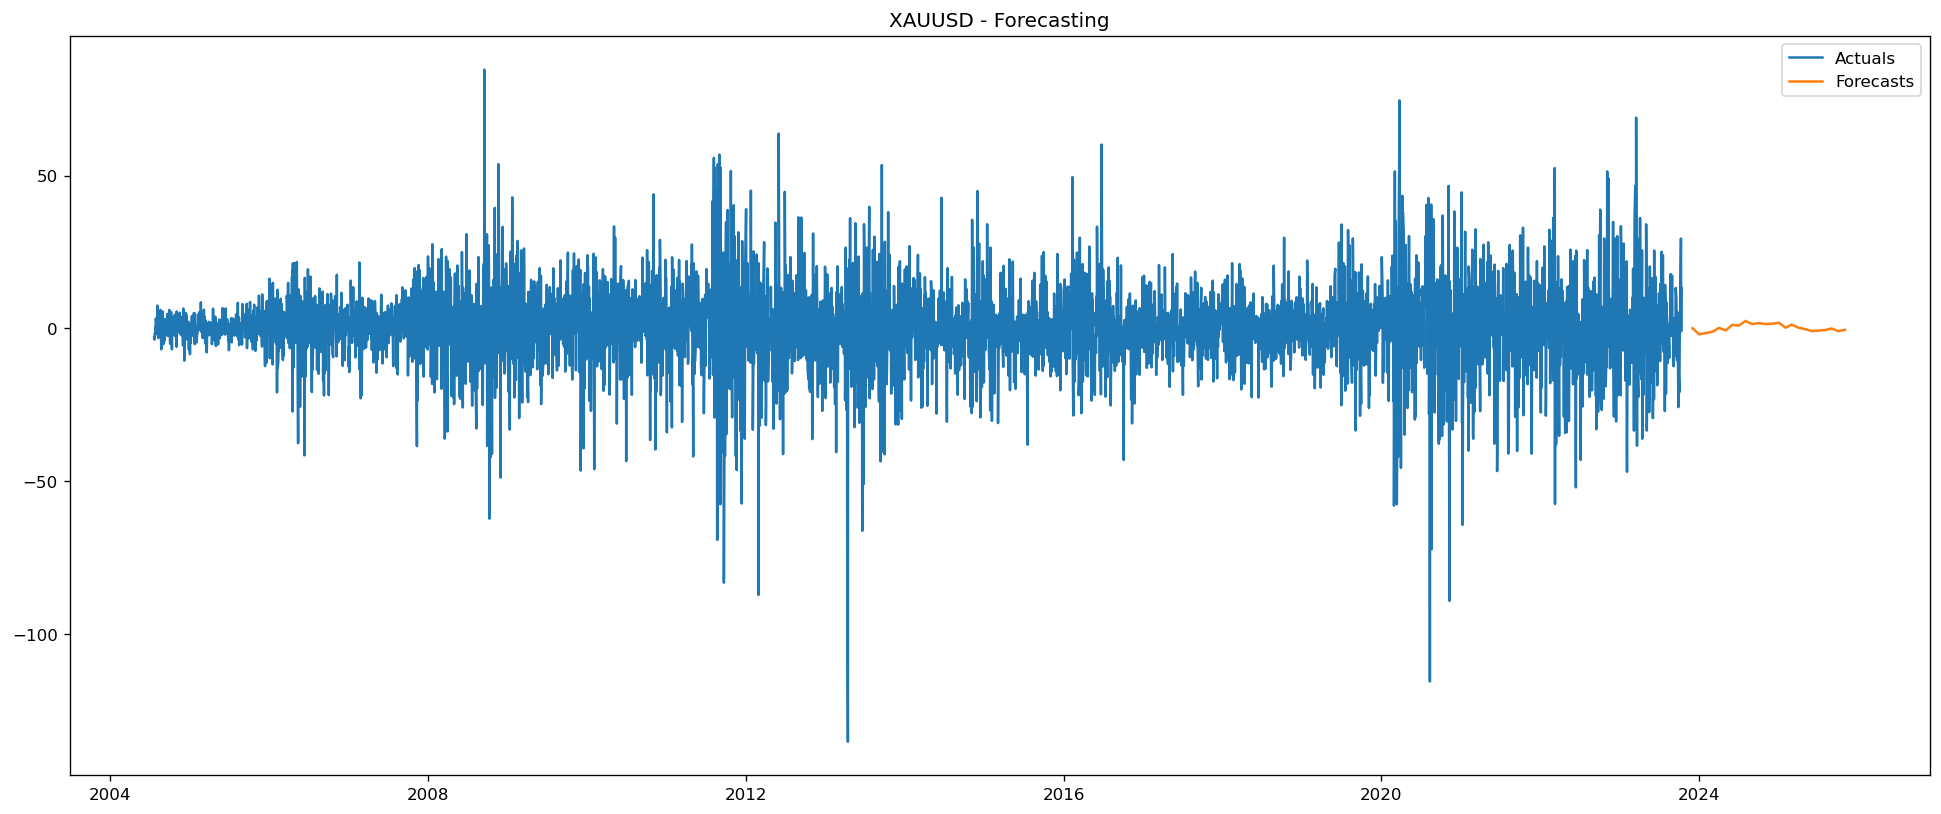

In [ ]:
plt.figure(figsize=(20, 8))
# Plotting the Actuals
plt.plot(df3_process.index, df3_process.XAUUSD, label='Actuals')

# Plotting the Forecasts
plt.plot(XAUUSD_PredDF.index, XAUUSD_PredDF, label='Forecasts')
plt.legend(loc='best')
plt.title("XAUUSD - Forecasting")
plt.show()

In [ ]:
df3_filled.head(5)

,XAUUSD,CPIAUCSL,M2,GDP,DXY
DATE,,,,,
2004-07-21,396.6,189.1,6276.1,12305.307,88.56
2004-07-22,393.6,189.1,6276.1,12305.307,88.45
2004-07-23,389.9,189.1,6276.1,12305.307,89.26
2004-07-26,388.5,189.1,6240.6,12305.307,89.03
2004-07-27,386.9,189.1,6240.6,12305.307,89.79


## Do not perform differencing to achieve stationarity

Checking stationarity for XAUUSD
ADF Statistic: -1.5270859310356975
p-value: 0.5200723146352955
Critical Values: {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}

Checking stationarity for CPIAUCSL
ADF Statistic: 2.5641196423683197
p-value: 0.9990676519598553
Critical Values: {'1%': -3.4316685582701103, '5%': -2.862122659192098, '10%': -2.5670801503632363}

Checking stationarity for M2
ADF Statistic: 1.353664369590446
p-value: 0.9968931361515845
Critical Values: {'1%': -3.431670688657576, '5%': -2.862123600382394, '10%': -2.567080651396155}

Checking stationarity for GDP
ADF Statistic: 0.49975880374699494
p-value: 0.9848657634967908
Critical Values: {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}

Checking stationarity for DXY
ADF Statistic: -1.1183775835825849
p-value: 0.7076877739818754
Critical Values: {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}

Cointegration test eigenvalues: [

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Selected VAR order:  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        43.48       43.49   7.666e+18       43.49
1        13.84      13.89*   1.029e+06       13.86
2        13.85       13.93   1.033e+06       13.88
3        13.85       13.98   1.038e+06       13.90
4        13.86       14.03   1.044e+06       13.92
5        13.86       14.07   1.045e+06       13.93
6        13.85       14.10   1.037e+06       13.94
7        13.85       14.13   1.034e+06       13.95
8        13.85       14.18   1.037e+06       13.97
9        13.86       14.22   1.041e+06       13.99
10       13.86       14.27   1.049e+06       14.01
11       13.81       14.25   9.918e+05       13.96
12       13.82       14.30   1.001e+06       13.99
13       13.82       14.35   1.008e+06       14.01
14       13.83       14.40   1.017e+06       14.03
15       13.83       14.44   1.018e+06       14.05
16       13

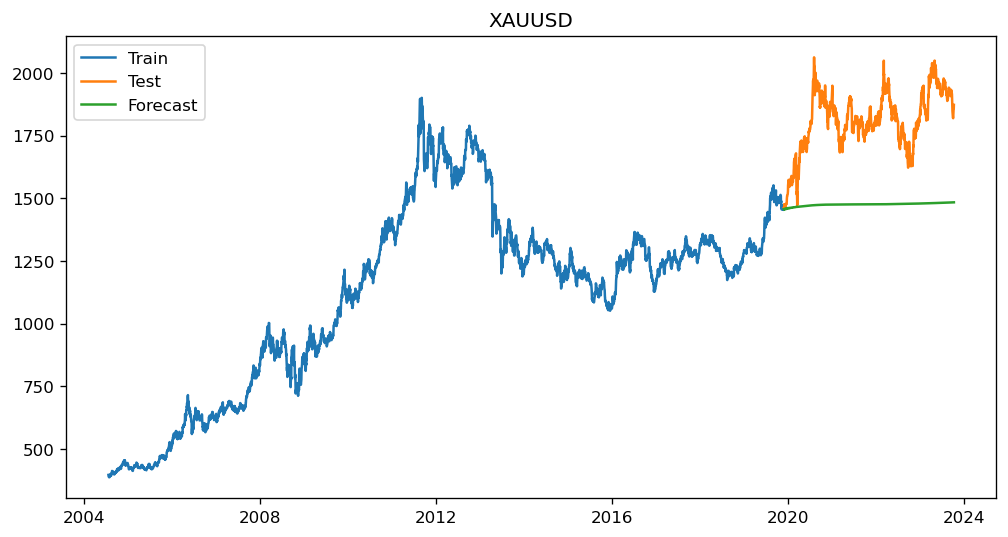

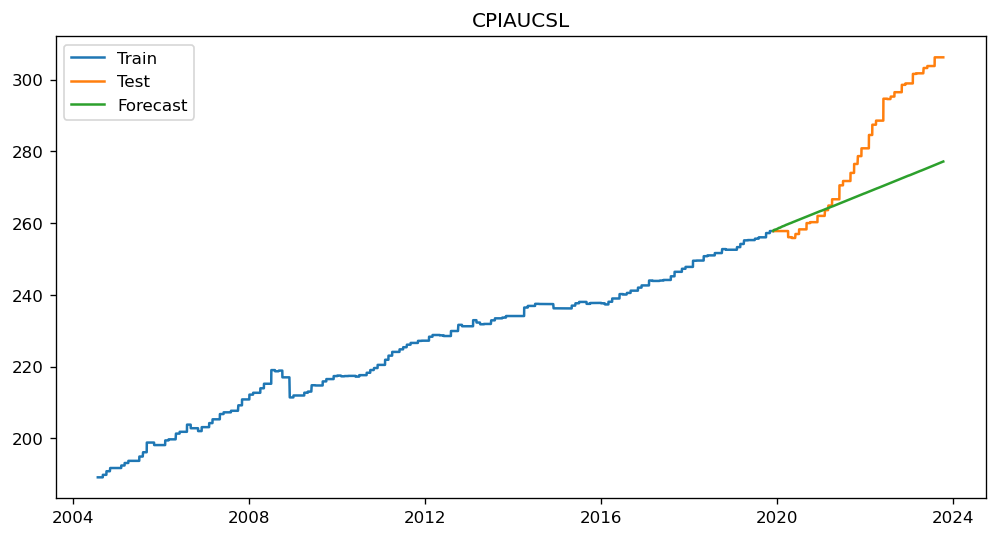

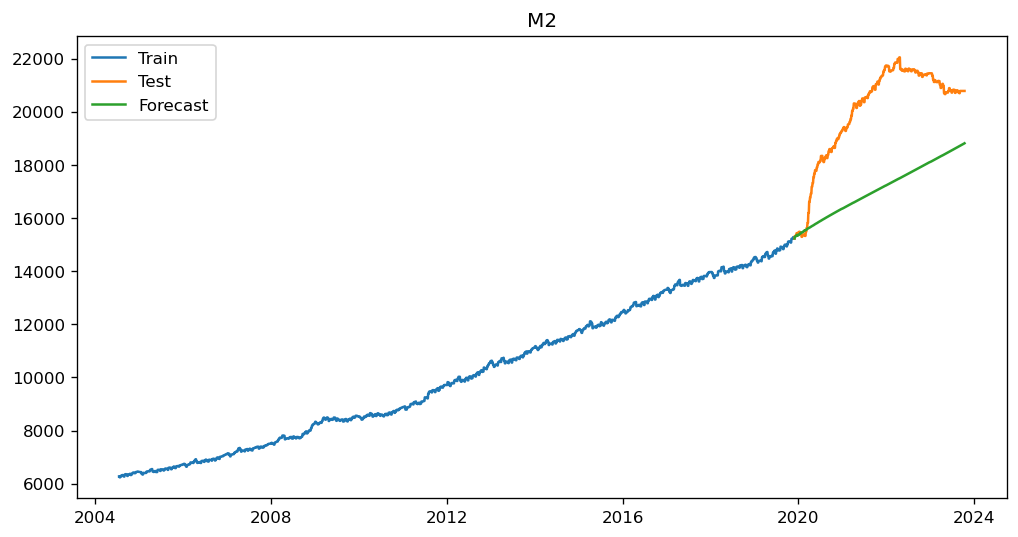

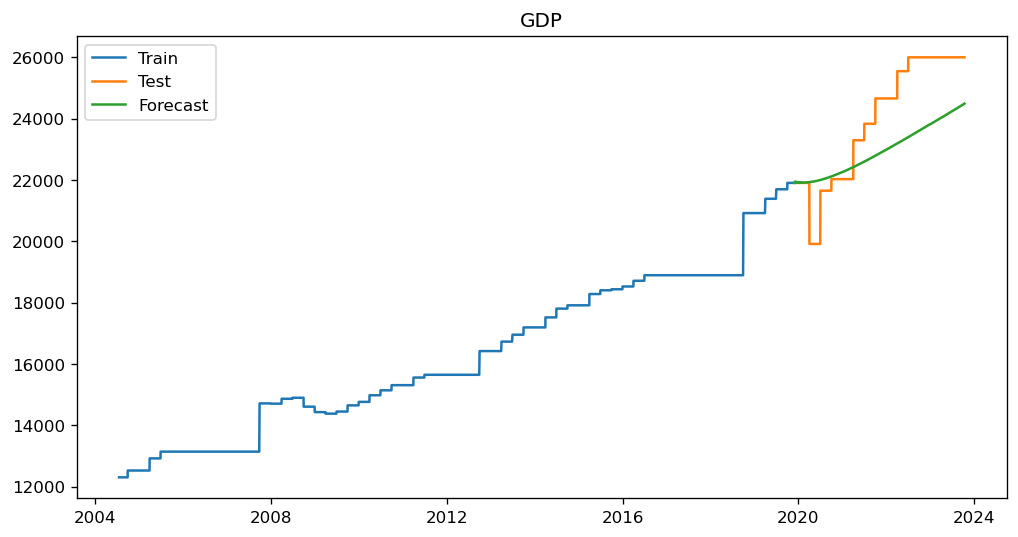

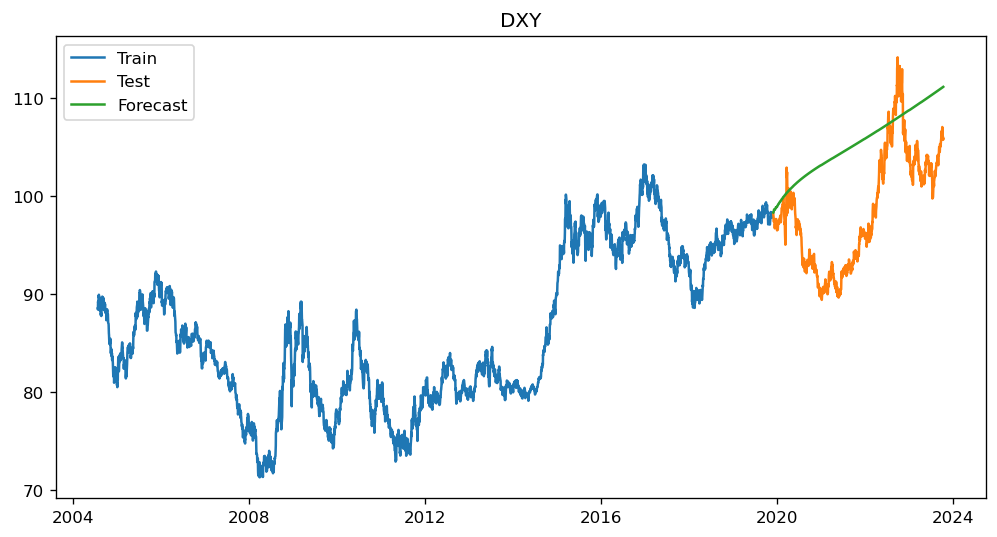

In [ ]:
# Do not perform differencing to achieve stationarity

import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller

data = df3_filled

# Check for stationarity
def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

for column in data.columns:
    print(f"Checking stationarity for {column}")
    check_stationarity(data[column])
    print()

# If necessary, perform differencing to achieve stationarity
# Example: data = data.diff().dropna()

# Cointegration test (Johansen test)
coint_result = coint_johansen(data, det_order=0, k_ar_diff=1)
print('Cointegration test eigenvalues:', coint_result.eig)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Fit VAR model
model = VAR(train)
order = model.select_order()
print('Selected VAR order:', order.summary())

fitted_model = model.fit(order.selected_orders['aic'])

# Forecast
forecast = fitted_model.forecast(train.values, steps=len(test))

# Convert the forecast result to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Evaluate the model using RMSE
for column in data.columns:
    print(f"RMSE for {column}: {rmse(forecast_df[column], test[column])}")

# Plot the actual vs. predicted values
for column in data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[column], label='Train')
    plt.plot(test.index, test[column], label='Test')
    plt.plot(test.index, forecast_df[column], label='Forecast')
    plt.title(column)
    plt.legend()
    plt.show()


## Perform differencing to achieve stationarity

Checking stationarity for XAUUSD
ADF Statistic: -1.5270859310356975
p-value: 0.5200723146352955
Critical Values: {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}

Checking stationarity for CPIAUCSL
ADF Statistic: 2.5641196423683197
p-value: 0.9990676519598553
Critical Values: {'1%': -3.4316685582701103, '5%': -2.862122659192098, '10%': -2.5670801503632363}

Checking stationarity for M2
ADF Statistic: 1.353664369590446
p-value: 0.9968931361515845
Critical Values: {'1%': -3.431670688657576, '5%': -2.862123600382394, '10%': -2.567080651396155}

Checking stationarity for GDP
ADF Statistic: 0.49975880374699494
p-value: 0.9848657634967908
Critical Values: {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}

Checking stationarity for DXY
ADF Statistic: -1.1183775835825849
p-value: 0.7076877739818754
Critical Values: {'1%': -3.4316624715142177, '5%': -2.862119970102166, '10%': -2.5670787188546584}

Cointegration test eigenvalues: [

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Selected VAR order:  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        13.85      13.85*   1.032e+06       13.85
1        13.85       13.90   1.035e+06       13.87
2        13.85       13.94   1.040e+06       13.89
3        13.86       13.99   1.045e+06       13.90
4        13.86       14.03   1.047e+06       13.92
5        13.85       14.06   1.039e+06       13.93
6        13.85       14.10   1.037e+06       13.94
7        13.85       14.14   1.040e+06       13.96
8        13.86       14.18   1.044e+06       13.97
9        13.87       14.23   1.052e+06       14.00
10       13.81       14.21   9.939e+05       13.95
11       13.82       14.26   1.003e+06       13.98
12       13.83       14.31   1.011e+06       14.00
13       13.84       14.36   1.020e+06       14.02
14       13.84       14.40   1.021e+06       14.04
15       13.76       14.37   9.487e+05       13.98
16       13

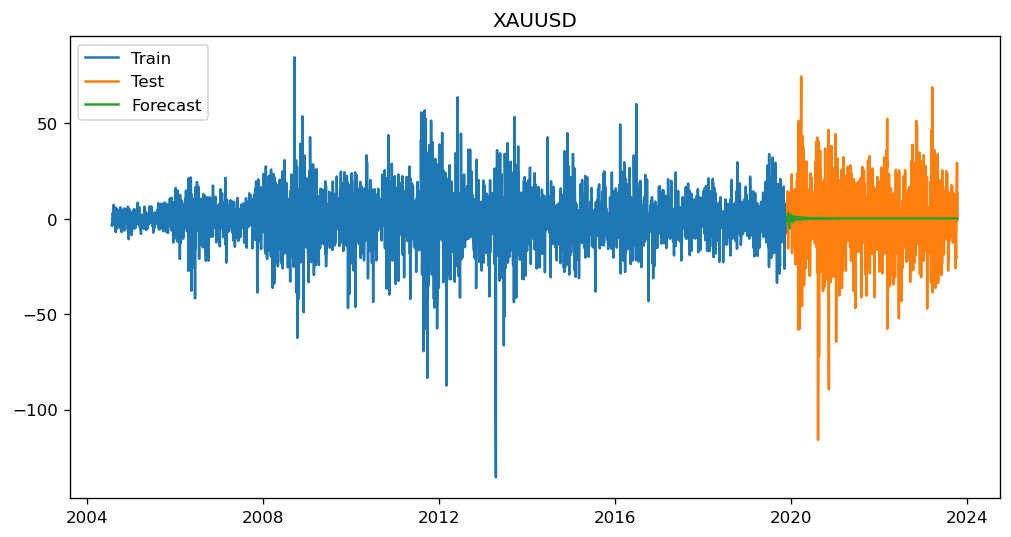

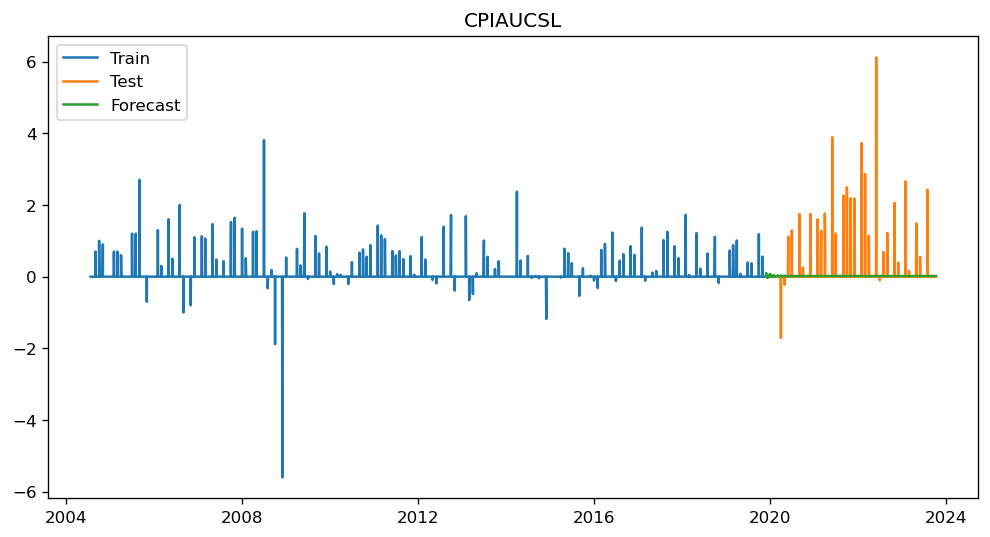

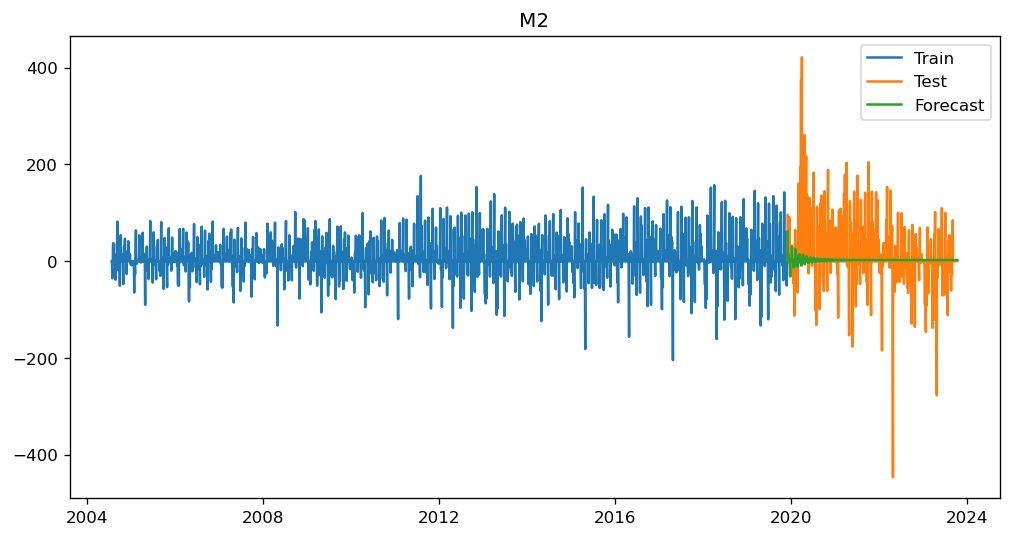

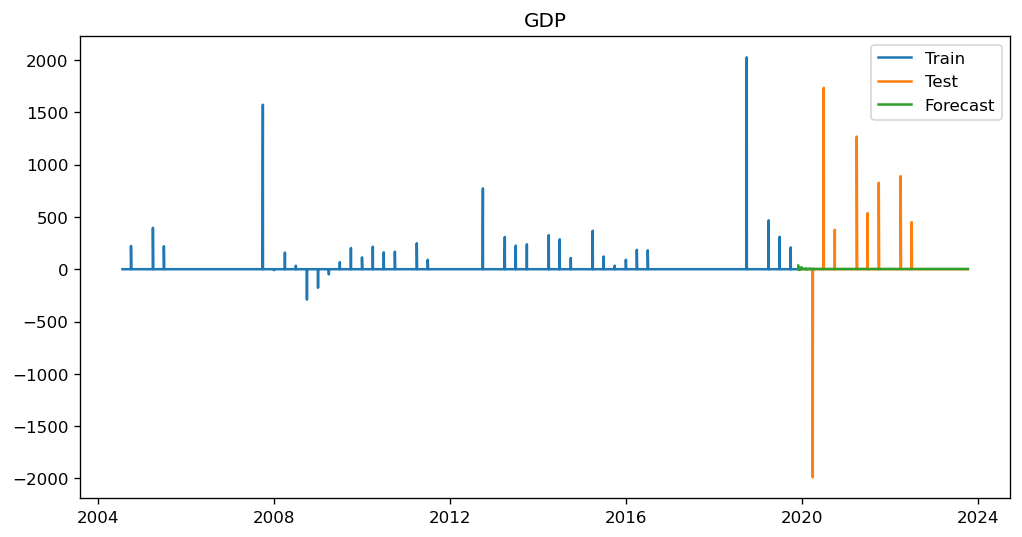

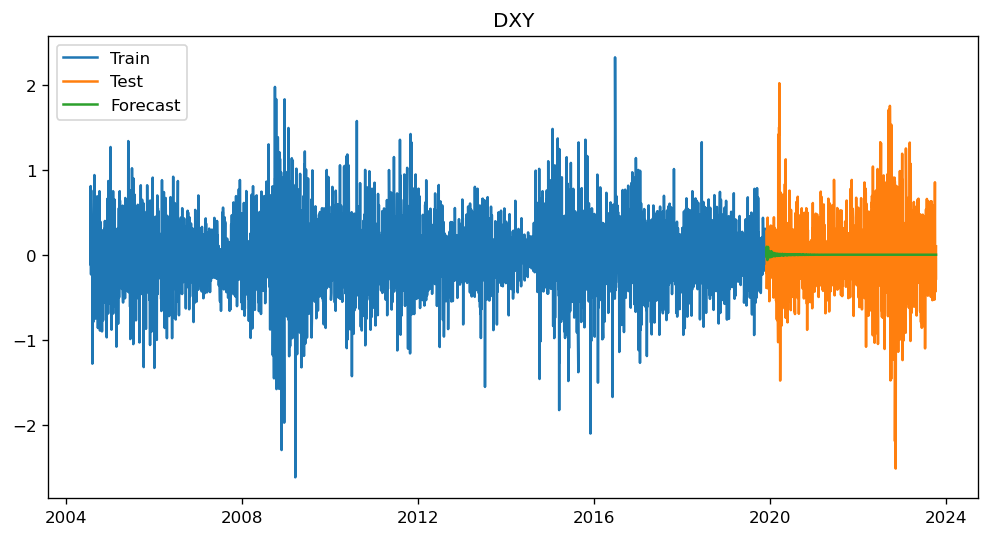

In [ ]:
# perform differencing to achieve stationarity

import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller

data = df3_filled

# Check for stationarity
def check_stationarity(df):
    result = adfuller(df)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

for column in data.columns:
    print(f"Checking stationarity for {column}")
    check_stationarity(data[column])
    print()

# If necessary, perform differencing to achieve stationarity
# Example:
data = data.diff().dropna()

# Cointegration test (Johansen test)
coint_result = coint_johansen(data, det_order=0, k_ar_diff=1)
print('Cointegration test eigenvalues:', coint_result.eig)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:]

# Fit VAR model
model = VAR(train)
order = model.select_order()
print('Selected VAR order:', order.summary())

fitted_model = model.fit(order.selected_orders['aic'])

# Forecast
forecast = fitted_model.forecast(train.values, steps=len(test))

# Convert the forecast result to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Evaluate the model using RMSE
for column in data.columns:
    print(f"RMSE for {column}: {rmse(forecast_df[column], test[column])}")

# Plot the actual vs. predicted values
for column in data.columns:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[column], label='Train')
    plt.plot(test.index, test[column], label='Test')
    plt.plot(test.index, forecast_df[column], label='Forecast')
    plt.title(column)
    plt.legend()
    plt.show()
